<a href="https://colab.research.google.com/github/askolesov0608/SJK0015/blob/main/chap14_FIN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Robotics, Vision & Control 3e: for Python
## Chapter 14: Using Multiple Images

In [1]:
try:
    import google.colab
    print('Running on CoLab')
    !pip install matplotlib
    !pip install machinevision-toolbox-python
    !pip install --no-deps rvc3python
    COLAB = True
except:
    COLAB = False

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "last_expr_or_assign"
from IPython.core.display import HTML

import RVC3 as rvc
import sys, os.path
sys.path.append(os.path.join(rvc.__path__[0], 'examples'))

import numpy as np
from scipy import linalg, stats
import matplotlib.pyplot as plt
import math
from math import pi
np.set_printoptions(
    linewidth=120, formatter={
        'float': lambda x: f"{0:8.4g}" if abs(x) < 1e-10 else f"{x:8.4g}"})
np.random.seed(0)
from machinevisiontoolbox.base import *
from machinevisiontoolbox import *
from spatialmath.base import *
from spatialmath import *



Running on CoLab
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 238.0/238.0 kB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 399.7/399.7 MB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.9/184.9 kB 17.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.7/128.7 MB 8.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 62.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.4/139.4 kB 13.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 204.2/204.2 kB 15.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 62.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.9/98.9 kB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 55.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 54.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468

# 14.1 Point Feature Correspondence


In [2]:
view1 = Image.Read("eiffel-1.png", mono=True)
view2 = Image.Read("eiffel-2.png", mono=True)

Image: 1280 x 960 (uint8) [.../images/eiffel-2.png]

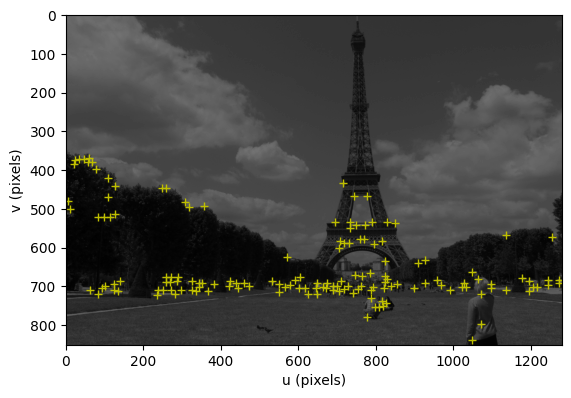

In [3]:
hf = view1.Harris(nfeat=150)  #На первом изображении с помощью детектора Харриса обнаруживается 150 характеристических точек.
view1.disp(block=None, darken=True); hf.plot(); ##Отображаются найденные точки на изображении.

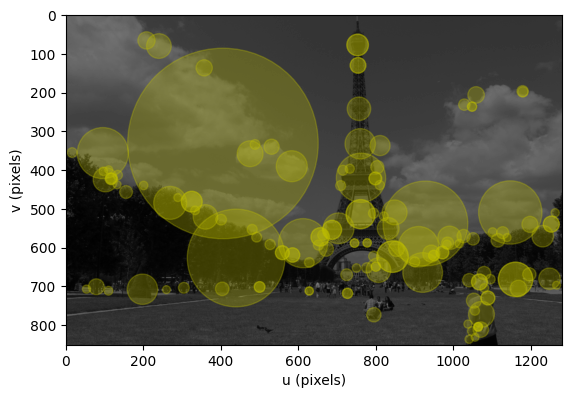

In [4]:
sf = view1.SIFT().sort().filter(minscale=10)[:150]  #На том же изображении с помощью SIFT обнаруживается набор
                                                    # характеристических точек, которые затем сортируются и фильтруются
                                                    #по минимальному масштабу, выбирая 150 наиболее значимых.
view1.disp(block=None, darken=True); sf.plot(filled=True, color="y", alpha=0.3) #Отображаются отобранные точки SIFT на изображении.


Работа с Дескрипторами

In [5]:
hf[0].descriptor.shape #Проверяются размер дескриптора первой точки Харриса

(121,)

In [6]:
hf[0].distance(hf[1], metric="ncc") # вычисляется расстояние между дескрипторами первой и второй
                                    #точек по метрике нормализованного перекрестного корреляции (NCC).

array([[  0.5908]])

In [7]:
sf[0].descriptor.shape #Аналогично проверяются размер дескриптора первой точки SIFT

(128,)

In [8]:
sf[0].distance(sf[1], metric="L2") #вычисляется расстояние между дескрипторами
                                   #первой и второй точек по метрике Евклидова расстояния (L2).

array([[   484.1]])

In [9]:
sf1 = view1.SIFT() #Обнаруживаются характеристические точки SIFT на обоих изображениях.
sf2 = view2.SIFT()

SIFTFeature features, 3028 points

In [10]:
matches = sf1.match(sf2); #Выполняется поиск соответствий между характеристическими точками первого и второго изображений.
len(matches)

860

In [11]:
matches[:5].list() #Выводится количество найденных соответствий и информация о первых пяти.

  0:    24.00 (1118.6, 178.7) <--> (952.5, 417.9)
  1:    24.12 (900.2, 636.6) <--> (775.6, 802.3)
  2:    25.81 (760.3, 125.0) <--> (656.2, 369.1)
  3:    27.33 (820.5, 519.0) <--> (708.0, 701.6)
  4:    28.12 (801.1, 632.4) <--> (694.1, 800.3)


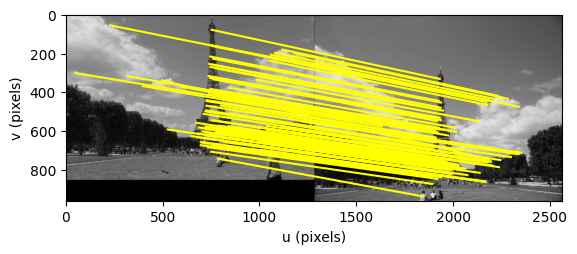

In [12]:
matches.subset(100).plot(color="yellow", block=None) #Визуализируются найденные соответствия, показывая связи между точками на обоих изображениях.

In [13]:
c = matches.correspondence(); #Этот вызов получает полный массив соответствий c,
                              #где предполагается, что каждая строка содержит информацию о паре соответствующих точек.

#matches.correspondence() предполагает получение массива соответствий
                              # между характеристическими точками на двух изображениях,
                              #найденных с помощью алгоритма SIFT
                                #Метод correspondence() возвращает матрицу или массив,
                                #где каждая строка представляет пару соответствующих точек
                                #между первым и вторым изображением.
                                #Каждая колонка в этой матрице представляет определенный атрибут соответствия,
                                #например, индексы точек на первом и втором изображениях,
                                #и возможно, другие параметры, такие как оценка качества соответствия.
c[:, :5]  #обращение c[:, :5] возвращает первые пять колонок из этого массива для всех строк.

array([[2890, 2467, 1661, 2218, 2081],
       [2258, 1945, 1412, 1773, 1705]])

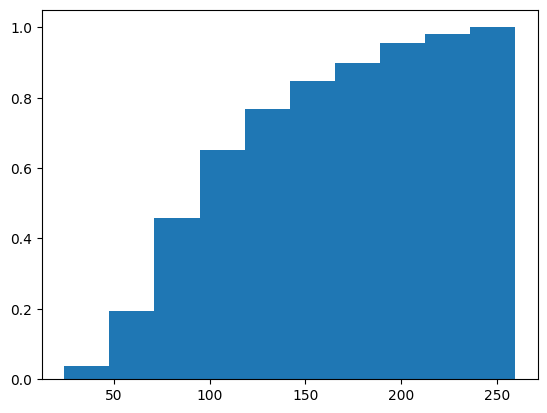

In [14]:
plt.hist(matches.distance, cumulative=True, density=True); #Здесь строится кумулятивная гистограмма распределения расстояний
                                                          #между сопоставленными парами точек.
                                                          #Параметр cumulative=True делает гистограмму кумулятивной,
                                                          #а density=True нормализует значения,
                                                          #так что под графиком получается единичная площадь.
                                                          #Это может помочь понять, какое расстояние между парами точек
                                                          #является наиболее частым и насколько большой разброс значений.

In [15]:
#Сопоставление с Пороговым Значением Расстояния
m = sf1.match(sf2, thresh=20); #Пары точек, расстояние между которыми превышает порог в 20,
                               #исключаются из результата.
                               #Это позволяет отфильтровать менее уверенные сопоставления,
                               #уменьшая количество ложных соответствий.
m

860 matches

In [16]:
#Сортировка Сопоставлений и Отбор Лучших
m = sf1.match(sf2, sort=True)[:10]; #Сначала все сопоставления сортируются по увеличению расстояния
                                    #(или другому показателю качества сопоставления),
                                    #затем выбираются 10 наилучших сопоставлений.
                                    #Это позволяет сконцентрироваться на самых уверенных сопоставлениях.
m

10 matches

In [17]:
#Сопоставление с Использованием Отношения Расстояний
m = sf1.match(sf2, ratio=0.8)        #Используется критерий отношения расстояний для отбора сопоставлений.
                                     #Точка из первого изображения сопоставляется с точкой из второго изображения
                                     #только если расстояние до ближайшего соседа значительно меньше
                                     #расстояния до второго ближайшего соседа
                                     #(на 80% меньше в данном случае).
                                     #Это уменьшает количество ложных сопоставлений, требуя,
                                     #чтобы сопоставленные точки были значительно ближе друг к другу, чем к любым другим точкам.
m

951 matches

In [18]:
#Сопоставление с Взаимной Проверкой
m = sf1.match(sf2, crosscheck=True)  #При взаимной проверке точка
                                      #A из первого изображения считается соответствующей точке
                                      #B из второго изображения, только если при обратном сопоставлении точка
                                      #B также выбирает точку
                                      #A как наилучшее сопоставление.
                                      # Этот подход помогает исключить односторонние или неоднозначные соответствия,
                                      #улучшая точность результатов сопоставления.

1372 matches

# 14.2 Geometry of Multiple Views


важная концепция в компьютерном зрении для понимания взаимосвязей между несколькими камерами и сценами, которые они наблюдают.

In [19]:
camera1 = CentralCamera(name="camera 1", f=0.002, imagesize=1000,
                        rho=10e-6, pose=SE3.Tx(-0.1)*SE3.Ry(0.4))

           Name: camera 1 [CentralCamera]
     pixel size: 1e-05 x 1e-05
     image size: 1000 x 1000
           pose: t = -0.1, 0, 0; rpy/yxz = 0°, 0°, 22.9°
   principal pt: [     500      500]
   focal length: [   0.002    0.002]

In [20]:
camera2 = CentralCamera(name="camera 2", f=0.002, imagesize=1000,
                        rho=10e-6, pose=SE3.Tx(0.1)*SE3.Ry(-0.4))

           Name: camera 2 [CentralCamera]
     pixel size: 1e-05 x 1e-05
     image size: 1000 x 1000
           pose: t = 0.1, 0, 0; rpy/yxz = 0°, 0°, -22.9°
   principal pt: [     500      500]
   focal length: [   0.002    0.002]

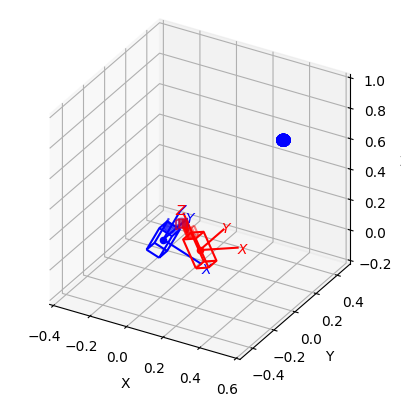

In [21]:
ax = plotvol3([-0.4, 0.6, -0.5, 0.5, -0.2, 1]); #Создается трехмерный пространственный объем для визуализации сцены.
camera1.plot(ax=ax, scale=0.15, shape="camera", frame=True, color="blue"); #Обе камеры визуализируются в созданном объеме с указанием
                                                                           #масштаба, формы (в данном случае, символа камеры), рамки и цвета.
camera2.plot(ax=ax, scale=0.15, shape="camera", frame=True, color="red");
P=[0.5, 0.1, 0.8];
plot_sphere(0.03, P, color="blue"); #В пространстве визуализируется точка P в виде сферы синего цвета.

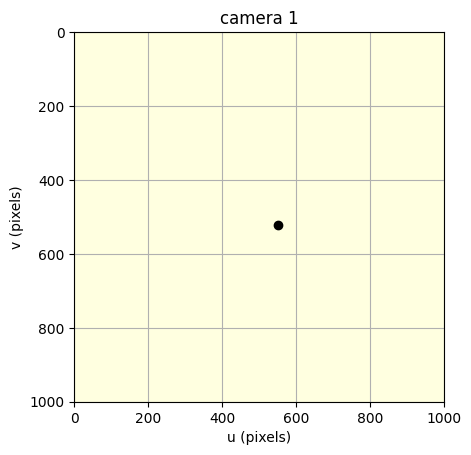

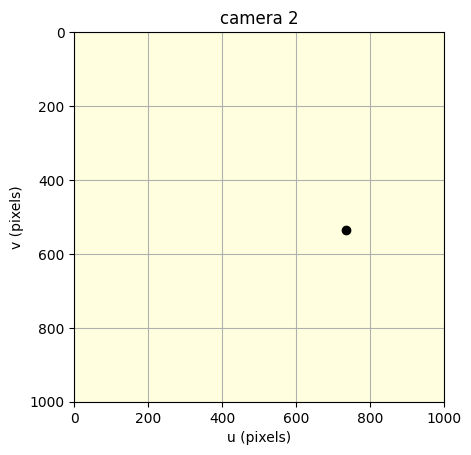

array([[     734],
       [   534.4]])

In [22]:
p1 = camera1.plot_point(P) #Проекции точки P на изображения,
                          #получаемые обеими камерами, визуализируются на соответствующих изображениях.
p2 = camera2.plot_point(P)

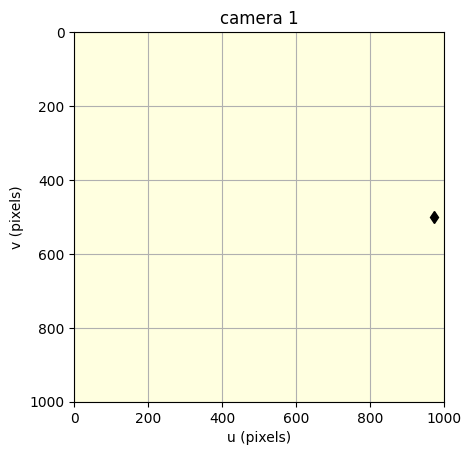

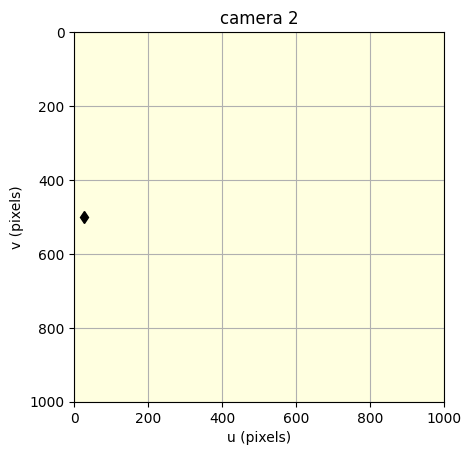

array([[   26.96],
       [     500]])

In [23]:
e1 = camera1.plot_point(camera2.centre, "kd") #Также визуализируются проекции центров каждой камеры
                                              #на изображение другой камеры,
                                              #используя маркеры в форме черного ромба ("kd").
                                              #Это позволяет показать взаимное положение камер в пространстве.
e2 = camera2.plot_point(camera1.centre, "kd")

## 14.2.1 The Fundamental Matrix


In [24]:
#Вычисление Фундаментальной Матрицы
F = camera1.F(camera2) #Вычисляется фундаментальная матрица F между двумя камерами camera1 и camera2.
                       # Эта матрица связывает соответствующие точки на двух изображениях
                       # и используется для описания эпиполярной геометрии между парами камер.

array([[       0, -1.947e-06, 0.0009735],
       [-1.947e-06,        0, 0.001895],
       [0.0009735, 5.248e-05,  -0.9735]])

In [25]:
#Проверка Соответствия Точек
e2h(p2).T @ F @ e2h(p1) #Проверяется соответствие между проекциями точки P на двух изображениях
                        #(p1 и p2) с использованием фундаментальной матрицы F.
                        #e2h преобразует евклидовы координаты в гомогенные, а
                        #@ обозначает матричное умножение.

array([[       0]])

In [26]:
#Ранг Фундаментальной Матрицы
np.linalg.matrix_rank(F) #Вычисляется ранг фундаментальной матрицы F.
                         #Для идеальной фундаментальной матрицы его значение должно быть равно 2.

2

In [27]:
#Вычисление Эпиполей
e1h = linalg.null_space(F); #Вычисляются эпиполи для каждой камеры.
                            #Эпиполь для первой камеры (e1) находится в нулевом пространстве F,
                            #а для второй камеры (e2) — в нулевом пространстве транспонированной F.
                            #Преобразование из гомогенных в евклидовы координаты выполняется функцией h2e.
e1h.T

array([[  0.8894,    0.457, 0.0009141]])

In [28]:
e1 = h2e(e1h)

array([[     973],
       [     500]])

In [29]:
e2h = linalg.null_space(F.T);
e2 = h2e(e2h)

array([[   26.96],
       [     500]])

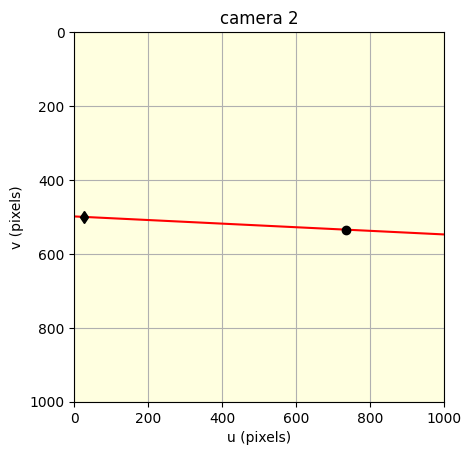

In [30]:
plt.clf()                                      #Для второй камеры визуализируются эпиполярные линии,
                                               # соответствующие проекциям точки P с первого изображения,
                                               #а также показывается эпиполь и сама точка P.
with plt.ioff():
    camera2.plot_epiline(F, p1, color="red");
    camera2.plot_point(camera1.centre, "kd");  # show the epipole
    camera2.plot_point(P);                     # show the point

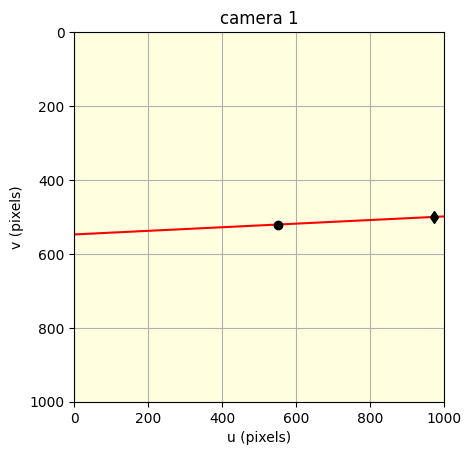

In [31]:
plt.clf()                                        #Аналогично визуализируются эпиполярные линии для первой камеры,
                                                 #но теперь в контексте проекций точки P со второго изображения.
with plt.ioff():
    camera1.plot_epiline(F.T, p2, color="red");
    camera1.plot_point(camera2.centre, "kd");  # show the epipole
    camera1.plot_point(P);                     # show the point


## 14.2.2 The Essential Matrix


объясняет работу с эссенциальной матрицей (Essential Matrix), которая является фундаментальным инструментом в стереовидении и компьютерном зрении для определения отношений между двумя камерами, особенно когда камеры калиброваны

In [32]:
E = camera1.E(F)  #Эта строка кода вычисляет эссенциальную матрицу E
                  #из фундаментальной матрицы F для первой камеры.
                  #Эссенциальная матрица связывает соответствующие точки на изображениях,
                  #сделанных двумя камерами, и содержит информацию о вращении и трансляции между камерами.

array([[       0, -0.07788,        0],
       [-0.07788,        0,   0.1842],
       [       0,  -0.1842,        0]])

In [33]:

T_1_2 = camera1.decomposeE(E);    #Декомпозиция эссенциальной матрицы для получения
                                   #возможных трансформаций (вращение и трансляция) между двумя камерами.
T_1_2

0:
   0.6967    0        -0.7174   -0.9211    
   0         1         0         0         
   0.7174    0         0.6967   -0.3894    
   0         0         0         1         
1:
   0.6967    0        -0.7174    0.9211    
   0         1         0         0         
   0.7174    0         0.6967    0.3894    
   0         0         0         1         
2:
   1         0         0        -0.9211    
   0        -1         0         0         
   0         0        -1        -0.3894    
   0         0         0         1         
3:
   1         0         0         0.9211    
   0        -1         0         0         
   0         0        -1         0.3894    
   0         0         0         1         


Расчет Истинной Трансформации

In [34]:

T_1_2.printline(orient="camera")

t = -0.921, 0, -0.389; rpy/yxz = 0°, 0°, -45.8°
t = 0.921, 0, 0.389; rpy/yxz = 0°, 0°, -45.8°
t = -0.921, 0, -0.389; rpy/yxz = 180°, 0°, 180°
t = 0.921, 0, 0.389; rpy/yxz = 180°, 0°, 180°


In [35]:
T_1_2_true = camera1.pose.inv() * camera2.pose;  #camera1.pose и camera2.pose представляют позиции
                                                 #(положение и ориентацию) первой и второй камер соответственно
                                                 #в мировом пространстве.
                                                 #Позиция камеры задается в виде гомогенной матрицы трансформации,
                                                 #которая включает в себя как вращение, так и трансляцию.
                                                  #.inv() применяется к позиции первой камеры
                                                  #для получения обратной трансформации,
                                                  #которая "отменяет" ее позицию, возвращая ее в исходное положение
                                                  #(например, в начало координат).
                                                   #Затем обратная трансформация первой камеры умножается на позицию второй камеры.
                                                   #Это действие вычисляет относительное положение
                                                   #и ориентацию второй камеры относительно первой,
                                                   #то есть трансформацию T_1_2_true,
                                                   #которая переводит систему координат первой камеры в систему координат второй камеры.

T_1_2_true.printline(orient="camera")  #Этот вызов выводит параметры полученной трансформации в удобочитаемом виде,
                                       # обычно включая информацию о вращении (в углах Эйлера или кватернионах)
                                       #и трансляции. Параметр orient="camera"
                                       #указывает на предпочтительный способ интерпретации ориентации.

t = 0.184, 0, 0.0779; rpy/yxz = 0°, 0°, -45.8°


In [36]:
T_1_2_true.t / np.linalg.norm(T_1_2_true.t) #Здесь .t обращается к вектору трансляции трансформации T_1_2_true.
                                            #Вектор нормализуется делением на его норму (длину),
                                            #что дает единичный вектор направления трансляции.
                                            #Этот единичный вектор показывает направление перемещения
                                            #от первой камеры ко второй, но не расстояние между ними.
#Стереозрение: вычисление глубины сцены на основе изображений, снятых с разных позиций.
#Фотограмметрия и 3D-реконструкция: создание трехмерных моделей объектов или сцен.
#Слежение за движением и навигация: определение, как камера или робот перемещается в пространстве.

array([  0.9211,        0,   0.3894])

In [37]:
Q = [0, 0, 10];

In [38]:
camera1.project_point(Q).T #Проецирование точки Q, расположенной в пространстве,
                #с помощью первой камеры. Точка Q задается в мировых координатах.

array([[   417.8,      500]])

In [39]:
for T in T_1_2: #Цикл, который проецирует точку Q на изображение первой камеры,
                 #используя каждую из возможных трансформаций, полученных при декомпозиции эссенциальной матрицы.
 print(camera1.project_point(Q, pose=T).T)

[[   746.1      500]]
[[     670      500]]
[[     nan      nan]]
[[     nan      nan]]


In [40]:
#Выбор Подходящей Трансформации
T = camera1.decomposeE(E, Q); #Выбор подходящей трансформации с учетом известной точки Q в пространстве.
                               #Это помогает определить, какая из возможных трансформаций является корректной
                               #с точки зрения реального положения точек в пространстве.
T.printline(orient="camera")

t = -0.921, 0, -0.389; rpy/yxz = 0°, 0°, -45.8°


## 14.2.3 Estimating the Fundamental Matrix from Real Image Data


In [41]:
#Генерация Трехмерных Точек
P = np.random.uniform(low=-1, high=1, size=(3, 10)) + np.c_[0, 0, 3].T;
       #Генерируются 10 случайных точек в трехмерном пространстве
       #с координатами от -1 до 1 по оси X и Y,
       # и смещением на 3 по оси Z, чтобы точки находились перед камерами.

In [42]:
#Проецирование Точек на Изображения
p1 = camera1.project_point(P); #Сгенерированные точки P проецируются на изображения
                               #с помощью двух камер (camera1 и camera2),
                               #получая координаты точек на каждом изображении (p1 и p2).
p2 = camera2.project_point(P);

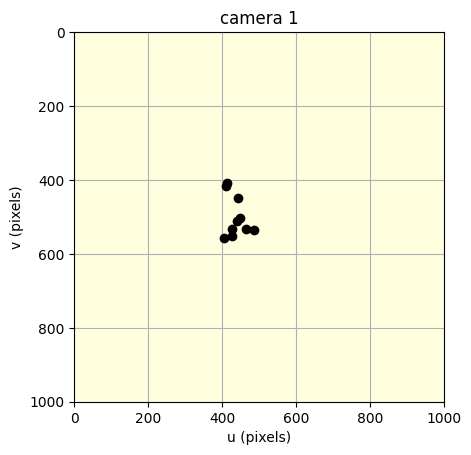

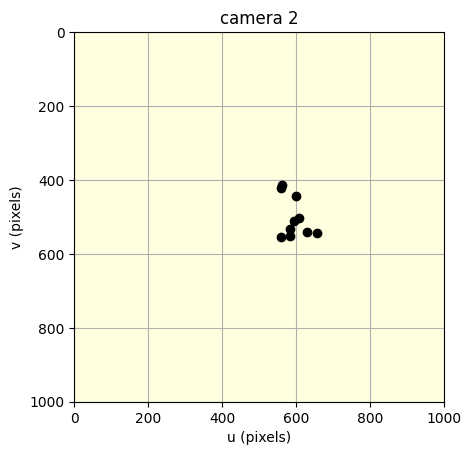

In [43]:
 camera1.plot_point(p1);
 camera2.plot_point(p2);

In [44]:
#Оценка Фундаментальной Матрицы
F, resid = CentralCamera.points2F(p1, p2) #На основе проекций точек на два изображения
                                          #оценивается фундаментальная матрица F, используя метод points2F.
                                          #Возвращается также остаточная ошибка resid, показывающая,
                                          #насколько хорошо фундаментальная матрица соответствует данным.
resid #Выводится значение остаточной ошибки.

1.3102964033825238e-07

In [45]:
np.linalg.matrix_rank(F) #Вычисляется ранг фундаментальной матрицы, который должен быть равен 2,
                         #поскольку идеальная фундаментальная матрица имеет ранг 2.

2

False


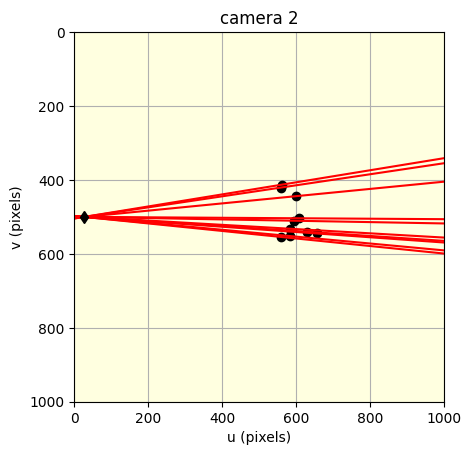

In [46]:
#Визуализируются проекции точек P и эпиполярные линии, соответствующие проекциям точек с первого изображения,
#на втором изображении. Также показывается эпиполь, представляющий позицию первой камеры в системе координат второй камеры.
plt.clf() #чищает текущее окно фигуры Matplotlib, чтобы новые графики не накладывались на предыдущие,
          #обеспечивая чистое пространство для визуализации.

with plt.ioff():   #используется для временного отключения интерактивного режима Matplotlib в блоке кода.
                    #Это означает, что создаваемые графики или изображения не будут отображаться на экране
                    #в реальном времени внутри этого блока. Вместо этого они будут обработаны в фоновом режиме,
                    #что может быть полезно для сохранения графиков в файлы, не показывая их сразу в интерфейсе пользователя.

    camera2.plot_point(P);     #изуализирует проекции трехмерных точек P на изображении,
                               #полученном с камеры camera2. Точки отображаются в координатах изображения,
                               #которые были получены в результате проекции.

    print(plt.isinteractive()) # выводит текущее состояние интерактивного режима Matplotlib,
                                #позволяя проверить, действительно ли интерактивный режим был временно отключен
                                #внутри блока with plt.ioff():.

    camera2.plot_epiline(F, p1, color="red") #рисует эпиполярные линии на изображении камеры camera2 для точек, проецированных камерой
 #camera1 (p1). Эти линии показывают,
 #по какому пути должны лежать соответствующие точки на втором изображении
 # в соответствии с эпиполярной геометрией, заданной фундаментальной матрицей F.

    camera2.plot_point(camera1.centre, "kd") # отображает эпиполь — точку на изображении camera2,
                                             #куда проецируется центр камеры camera1.
                                             #Эпиполь обозначается черным ромбом ("kd"), указывая на геометрическое место,
                                             #через которое проходят все эпиполярные линии на изображении camera2.


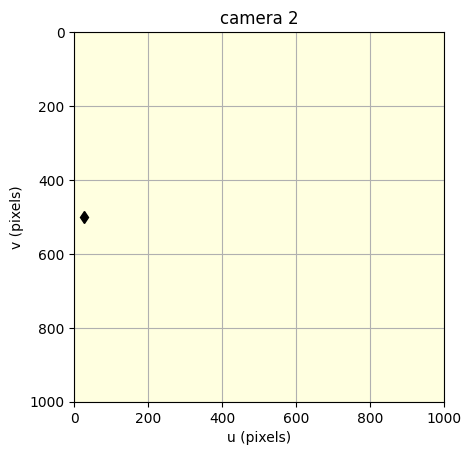

array([[   26.96],
       [     500]])

In [47]:
    camera2.plot_point(camera1.centre, "kd")

In [48]:
p2[:,[5, 6]] = p2[:,[6, 5]]; #Две проекции точек на втором изображении намеренно переставляются местами,
                            #что должно существенно изменить оценку фундаментальной матрицы и увеличить остаточную ошибку.

In [49]:
_, resid = CentralCamera.points2F(p1, p2);
resid

0.007142966331037329

In [50]:
#Расчет Эпиполярного Расстояния
CentralCamera.epidist(F, p1[:, 0], p2[:,0])  #Вычисляется эпиполярное расстояние между соответствующими
                                             #точками на изображениях, что помогает оценить точность соответствия точек
                                             #в контексте фундаментальной матрицы.
                                             #Эпиполярное расстояние для исходных точек и точек с измененными координатами
                                             #может значительно отличаться.
CentralCamera.epidist(F, p1[:, 5], p2[:,5])

array([[   34.82]])

In [51]:
F, resid, inliers = CentralCamera.points2F(p1, p2, method="ransac",  #Вычисляется фундаментальная матрица F
                                                                  #между двумя наборами точек p1 и p2 с использованием алгоритма RANSAC,
                                                                  #который помогает исключить выбросы и улучшить надежность оценки.
                                                                  #Возвращаемые значения включают саму матрицу F,
                                                                  #остаточную ошибку resid и индексы inliers,
                                                                  # представляющие согласованные пары точек.
                                           confidence=0.99, seed=0);
resid

1.540248393970562e-07

In [52]:
inliers #inliers, представляющие согласованные пары точек.

array([ True,  True,  True,  True,  True, False, False,  True,  True,  True])

In [53]:
#Работа с Матчами
#Аналогичная оценка фундаментальной матрицы, но уже для точек, полученных из объекта соответствий matches.
F, resid, inliers = CentralCamera.points2F(matches.p1, matches.p2,
                                           method="ransac", confidence=0.99);
resid
sum(inliers) / len(inliers) #Вычисляется доля точек, которые являются согласованными (inliers), от общего числа точек.

0.8244186046511628

In [54]:

sum(~inliers) #Вычисляется количество выбросов (outliers) путем инвертирования маски inliers.

151

In [55]:
#Оценка фундаментальной матрицы непосредственно из объекта соответствий matches
#с помощью встроенного метода .estimate().

F, resid = matches.estimate(CentralCamera.points2F, method="ransac",
                            confidence=0.99, seed=0);

In [56]:
matches
matches[:10].list()

  0:  +  24.00 (1118.6, 178.7) <--> (952.5, 417.9)
  1:  +  24.12 (900.2, 636.6) <--> (775.6, 802.3)
  2:  +  25.81 (760.3, 125.0) <--> (656.2, 369.1)
  3:  +  27.33 (820.5, 519.0) <--> (708.0, 701.6)
  4:  +  28.12 (801.1, 632.4) <--> (694.1, 800.3)
  5:  +  29.33 (1094.0, 184.7) <--> (932.9, 423.0)
  6:  +  31.06 (781.0, 214.4) <--> (672.8, 443.8)
  7:  +  33.60 (1094.0, 184.7) <--> (932.9, 423.0)
  8:  +  33.70 (526.5, 484.2) <--> (462.4, 673.6)
  9:  +  33.79 (759.7, 332.0) <--> (655.9, 543.0)


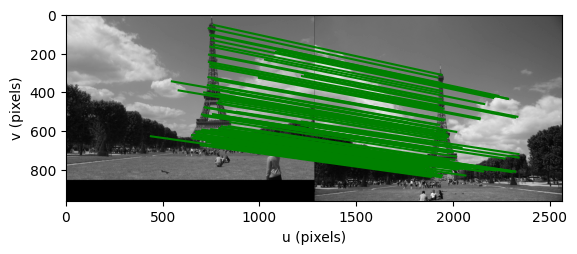

In [57]:
matches.inliers.subset(100).plot(color="g", block=None); #Визуализируются как согласованные пары точек (inliers, зеленым цветом),
                                                         # так и выбросы (outliers, красным цветом), демонстрируя качество соответствий.

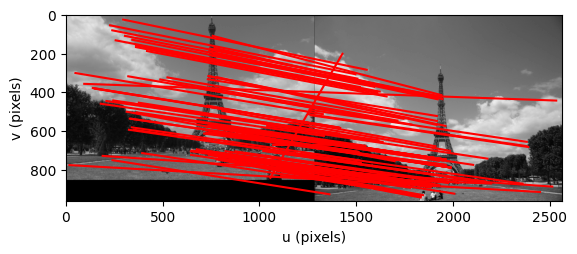

In [58]:
matches.outliers.subset(100).plot(color="red") #Визуализируются как согласованные пары точек (inliers, зеленым цветом),
                                               # так и выбросы (outliers, красным цветом), демонстрируя качество соответствий.

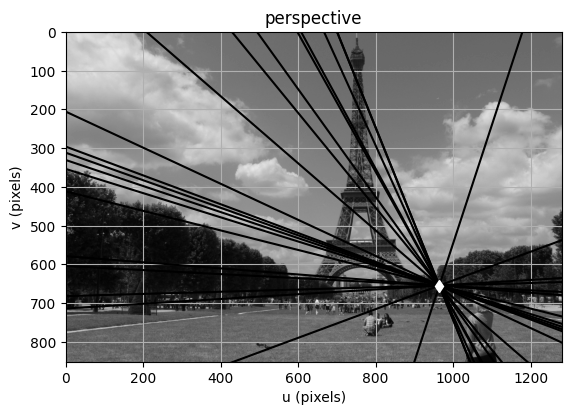

In [59]:
camera = CentralCamera(); #Создается объект camera, представляющий центральную камеру.
                          #В этом контексте не указываются конкретные параметры камеры,
                          # такие как фокусное расстояние или позиция,
                          #поскольку они могут быть заданы по умолчанию внутри класса CentralCamera.

with plt.ioff(): #В блоке с отключенным интерактивным режимом Matplotlib

    camera.disp(view1, block=None); #Метод disp() используется для отображения изображения view1,
                                    #полученного с камеры. block=None может указывать на то,
                                    #что после отображения изображения выполнение кода продолжится без блокировки.

    camera.plot_epiline(F.T, matches.inliers.subset(20).p2, color="black"); #Метод plot_epiline() визуализирует эпиполярные линии
                                                            #на изображении для подмножества согласованных точек (matches.inliers.subset(20).p2).
                                                            #Эти линии показывают, где на изображении view1 должны находиться соответствующие точки,
                                                            #основываясь на их проекциях во втором изображении.
                                                            #F.T указывает на использование транспонированной фундаментальной матрицы,
                                                            #адаптированной к контексту первого изображения.

    #Вычисление и Визуализация Эпиполя
    epipole = h2e(linalg.null_space(F))  #Вычисляется эпиполь как нулевое пространство
                                          #транспонированной фундаментальной матрицы F,
                                          #что дает координаты эпиполя в гомогенных координатах.
                                          #Функция h2e() преобразует эти координаты в евклидовы для последующей визуализации.

    camera.plot_point(epipole, "wd");   #Эпиполь отображается на изображении маркером в форме белого круга
                                        #с темной обводкой ("wd"), что позволяет наглядно определить его положение.

plt.show()

#### Excurse 14.3


Этот код демонстрирует использование метода RANSAC (RANdom SAmple Consensus) для робастной оценки параметров линии на основе данных с выбросами. RANSAC — это итеративный алгоритм, используемый для оценки параметров математической модели из набора данных, который содержит выбросы.

[6, 8, 0, 1, 5, 7, 10]

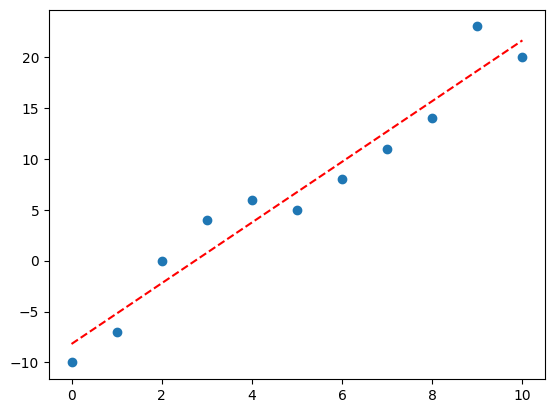

In [60]:
if COLAB:
    !pip install --no-deps rvc3python

from RVC3.examples import ransac_line

x = np.arange(11); #Создается набор данных x
y = 3 * x - 10;    #соответствующих значений y, которые формируют линейную зависимость y = 3x - 10.
                   #Это "идеальные" данные без шума.

nbad = 4;           #В набор данных вводятся выбросы (nbad штук)

np.random.seed(1)  # set the random number generator seed
                    #Для этого случайным образом выбираются 4 точки из массива y,

bad = np.random.choice(len(x), nbad, replace=False)
y[bad] = y[bad] + np.random.rand(nbad) * 10  #к их значениям добавляется случайное число в диапазоне от 0 до 10,
                                             #что значительно искажает линейную зависимость в этих точках.

plt.plot(x, y, 'o')   #На графике отображаются исходные точки данных, включая как корректные значения, так и выбросы.


#Применение Линейной Регрессии
m, c, *_ = stats.linregress(x, y)  #Используется линейная регрессия (stats.linregress)
                                   #для оценки параметров линии (наклона m и пересечения c) на основе всех доступных данных.
                                   #Построенная линия отображается красным пунктиром,
                                   #но из-за выбросов может плохо описывать исходную линейную зависимость.

plt.plot(x, m * x + c, 'r--');

#Применение RANSAC
params, inliers = ransac_line.ransac_line(x, y) #Запускается алгоритм RANSAC с функцией ransac_line из библиотеки RVC3,
                                                #который пытается оценить параметры линии (params), игнорируя выбросы.
                                                #Возвращаются параметры лучшей найденной линии и индексы точек (inliers),
                                                #которые считаются согласованными с этой моделью.

params       #Выводятся параметры лучшей модели линии, найденной алгоритмом RANSAC,
             #которые должны быть ближе к исходным параметрам m = 3 и c = -10.

inliers      #Выводятся индексы точек, которые алгоритм RANSAC считает согласованными с наилучшей моделью, исключая выбросы.


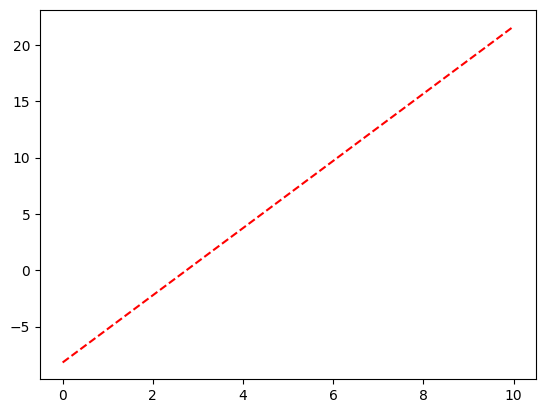

In [61]:
m, c, *_ = stats.linregress(x, y)
plt.plot(x, m * x + c, 'r--');
params, inliers = ransac_line.ransac_line(x, y)


In [62]:
params


(3.0, -10.0)

In [63]:
inliers

[1, 0, 5, 6, 7, 8, 10]

## 14.2.4 Planar Homography


In [64]:
#Определение Позиции и Ориентации Плоскости
T_grid = SE3.Tz(1) * SE3.Rx(0.1) * SE3.Ry(0.2); #T_grid представляет собой трансформацию, определяющую положение
                                                #и ориентацию сетки в трехмерном пространстве.
                                                 #SE3.Tz(1) создает трансляцию вдоль оси Z на единицу вперед,
                                                 #что позволяет расположить сетку на расстоянии 1 от начала координат по оси Z.
                                                   #SE3.Rx(0.1) и SE3.Ry(0.2) применяют вращения вокруг осей X и Y соответственно,
                                                   #задавая небольшой угол наклона сетки для создания эффекта перспективы.
                                                   #Углы задаются в радианах.

P = mkgrid(3, 1.0, pose=T_grid);   #mkgrid(3, 1.0, pose=T_grid) генерирует сетку из точек в трехмерном пространстве.
                                   #Параметры функции mkgrid указывают на создание сетки размером 3x3 с шагом 1.0 между точками сетки.
                                      #Аргумент pose=T_grid определяет, что сетка будет размещена и ориентирована в соответствии
                                      #с трансформацией T_grid, предоставляя возможность моделирования различных перспектив
                                      #и ориентаций сетки в пространстве.

Применение Плоской Гомографии
После создания сетки точек P можно применять плоскую гомографию для трансформации этих точек с целью сопоставления их с проекциями на изображения, получаемые с разных точек зрения, или для симуляции перспективных искажений, вызванных вращением и перемещением камеры относительно сетки.

Этот процесс может быть использован в ряде задач компьютерного зрения, включая:

Оценку перспективных преобразований между изображениями для реконструкции трехмерной сцены или объектов.
Стабилизацию изображений путем устранения эффектов вращения камеры.
Расчет параметров камеры и ее ориентации относительно сцены на основе известных геометрических объектов.

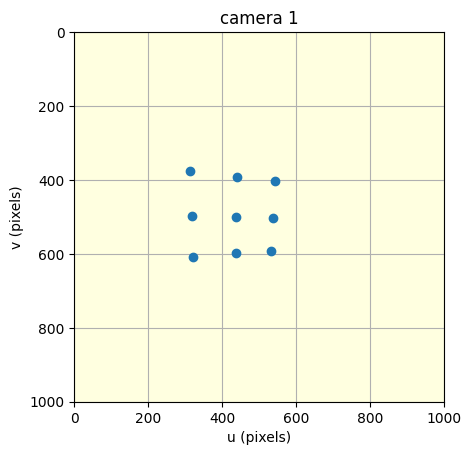

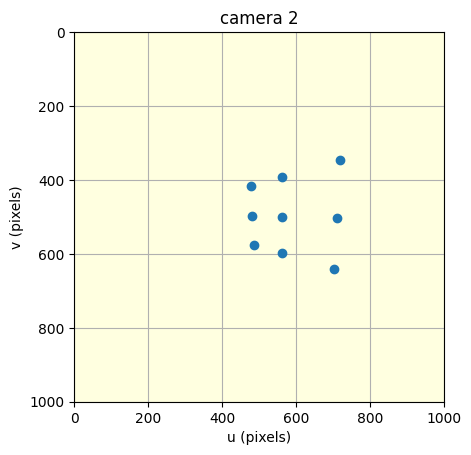

In [65]:
p1 = camera1.plot_point(P, "o"); #P — это набор трехмерных точек, сгенерированных ранее.
                                 #p1 и p2 — это проекции этих точек на изображения,
                                 #полученные с двух разных камер (camera1 и camera2 соответственно).
                                 #Точки отображаются на каждом из изображений маркером "o".
p2 = camera2.plot_point(P, "o");

In [66]:
#Вычисление Плоской Гомографии
H, resid = CentralCamera.points2H(p1, p2) #Используется метод points2H для вычисления матрицы плоской гомографии
                                          #H между двумя наборами точек p1 и p2.
                                          #Гомография описывает преобразование между этими точками в двумерном пространстве изображений.
                                          #resid возвращает остаточную ошибку этого преобразования.
H

array([[ -0.4187, -0.0003935,    397.8],
       [ -0.6981,   0.3738,    309.5],
       [-0.001396, -1.459e-05,        1]])

In [67]:
resid

4.838106817677405e-05

In [68]:
#Применение Гомографии
p2b = homtrans(H, p1); #Функция homtrans используется для трансформации точек p1
                       #с первого изображения в соответствующие точки p2b на втором изображении,
                       #используя гомографию H.

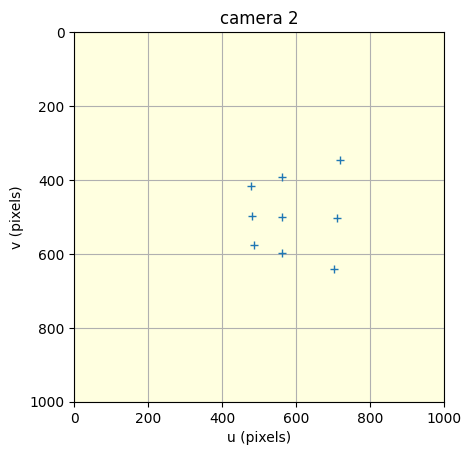

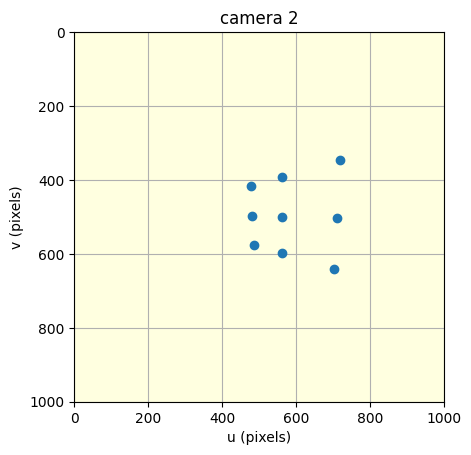

In [69]:
#with plt.ioff(): #В блоке с отключенным интерактивным режимом
camera2.plot_point(p2b, "+"); #изображении камеры camera2 отображаются трансформированные точки p2b маркером "+"

camera2.plot_point(P, "o");  # show original points #и сравниваются с оригинальными точками P, также отображенными на этом же изображении.

#plt.show()

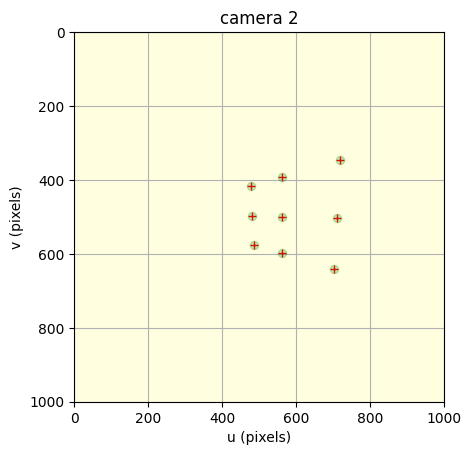

In [70]:
with plt.ioff(): #В блоке с отключенным интерактивным режимом
   camera2.plot_point(p2b, "+", color="red"); #изображении камеры camera2 отображаются трансформированные точки p2b маркером "+"

   camera2.plot_point(P, "o", color="green", alpha=0.2);  # show original points #и сравниваются с оригинальными точками P, также отображенными на этом же изображении.

plt.show()

In [71]:
#Обратное Преобразование
p1b = homtrans(np.linalg.inv(H), p1); #Для иллюстрации обратного процесса применяется обратная гомография к точкам p1,
                                      #что возвращает их в исходное положение.
                                      #Это демонстрирует, как можно использовать обратную гомографию для восстановления
                                      #исходного расположения точек.

In [72]:
#Здесь задается еще один набор точек Q для визуализации вместе с изначально сгенерированными точками P
Q = np.array([
  [-0.2302,   -0.0545,    0.2537],
  [ 0.3287,    0.4523,    0.6024],
  [ 0.4000,    0.5000,    0.6000] ]);

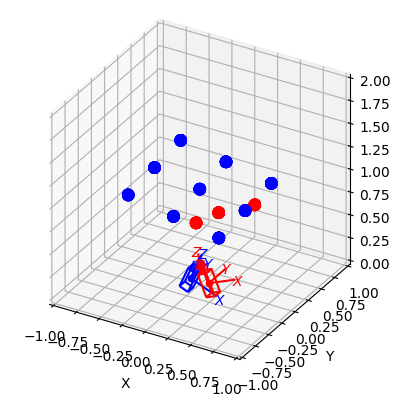

In [73]:
plotvol3([-1, 1, -1, 1, 0, 2]); #plotvol3 настраивает трехмерное пространство для визуализации,

plot_sphere(0.05, P, color="blue"); #plot_sphere используется для отображения точек как сфер заданных цветов
plot_sphere(0.05, Q, color="red");

camera1.plot(color="blue", frame=True, scale=0.2); # Затем визуализируются позиции камер camera1 и camera2 с указанием их цветов и рамок.

camera2.plot(color="red", frame=True, scale=0.2);

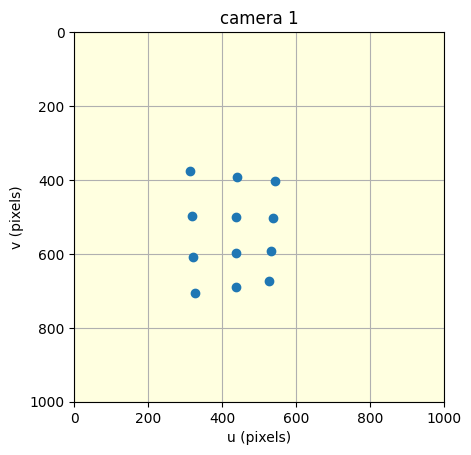

In [74]:
#Комбинация и Проецирование Точек

p1 = camera1.plot_point(np.hstack((P, Q)), "o"); #Точки P и Q объединяются в один массив с помощью np.hstack
                                                 #и проецируются на изображения обеими камерами (camera1 и camera2).
                                                 #Это позволяет получить два набора точек p1 и p2 на изображениях для последующего анализа.

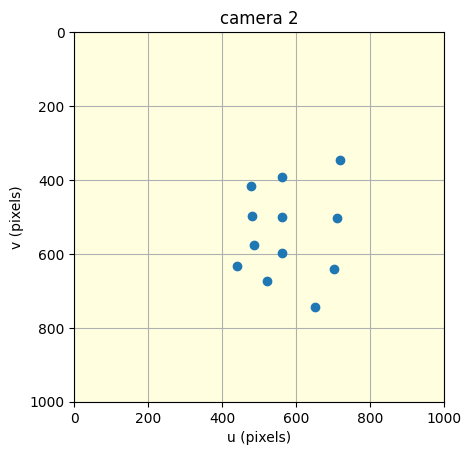

In [75]:
p2 = camera2.plot_point(np.hstack((P, Q)), "o");

In [76]:
#Применение Гомографии и Визуализация

p2h = homtrans(H, p1); #Гомография H, вычисленная ранее, применяется к точкам p1
                       #для получения их преобразованных положений p2h на втором изображении.

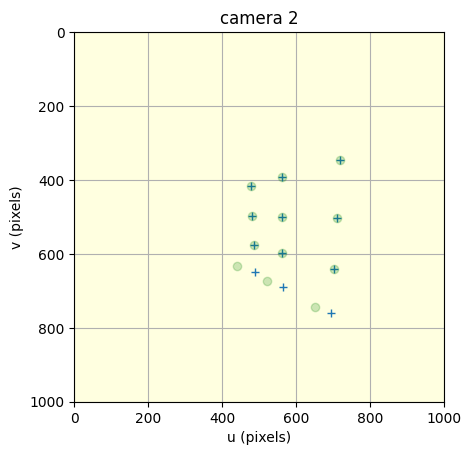

In [77]:
with plt.ioff(): #который отключает интерактивный режим

    camera2.plot_point(p2h, "+"); #визуализируются как трансформированные точки p2h  отображаются маркерами "+"

    camera2.plot_point(p2, color="green", alpha=0.2);    # show projected points  и исходные проекции точек p2 на изображении от camera2
plt.show()

In [78]:
#Анализ Разницы Между Проецированными и Трансформированными Точками
np.linalg.norm(homtrans(H, p1) - p2, axis=0) #Вычисляется Евклидово расстояние между преобразованными точками p2h
                                            #и исходными проекциями p2,
                                            #что позволяет оценить точность гомографии H.

array([1.262e-05, 9.673e-06, 6.544e-07, 8.302e-06, 4.34e-06, 1.189e-05, 1.679e-05, 5.884e-06, 3.927e-05,     50.6,
          46.44,    45.38])

In [79]:
#Повторная Оценка Гомографии с RANSAC
H, resid, inliers = CentralCamera.points2H(p1, p2, method="ransac"); #Гомография H оценивается заново с использованием метода RANSAC
                                                                      #для исключения выбросов из наборов точек p1 и p2,
                                                                      # улучшая тем самым качество и точность оценки.
                                                                      #Возвращаются новая матрица H, остаточная ошибка resid
                                                                      #и индексы inliers, указывающие на согласованные точки
print(resid)
print(inliers)

4.838106817677405e-05
[ True  True  True  True  True  True  True  True  True False False False]


In [80]:
#Декомпозиция Гомографии и Сравнение Позиций Камер
T, normals = camera1.decomposeH(H); #Метод decomposeH используется для получения трансформации T
                                     #и нормалей плоскости из матрицы гомографии H.
                                     #T представляет собой относительное положение
                                     #и ориентацию между камерами,
                                     #а normals — нормали к плоскости гомографии.
                                     #Затем сравниваются полученная трансформация T
                                     #и истинное относительное положение камер
                                    #(вычисленное через обратную позицию первой камеры, умноженную на позицию второй).
T.printline(orient="camera")

t = -0.185, 0, -0.0783; rpy/yxz = -8.39e-06°, 4.61e-06°, -45.8°
t = 0.185, 0, 0.0783; rpy/yxz = -8.39e-06°, 4.61e-06°, -45.8°
t = 0.0197, 0.0192, -0.199; rpy/yxz = 1.09°, 0.338°, -34.4°
t = -0.0197, -0.0192, 0.199; rpy/yxz = 1.09°, 0.338°, -34.4°


In [81]:

(camera1.pose.inv() * camera2.pose).printline(orient="camera")

t = 0.184, 0, 0.0779; rpy/yxz = 0°, 0°, -45.8°


In [82]:
##Сравнение Позиции Сетки и Трансформации
camera1.pose.inv() * T_grid #Вычисляется относительная позиция сетки относительно камеры camera1,
                            #применяя обратную трансформацию позиции камеры к трансформации сетки T_grid.
                            #Это позволяет понять, как сетка располагается относительно камеры в трехмерном пространстве.

   0.9797   -0.03888  -0.1968   -0.2973    
   0.01983   0.995    -0.09784   0         
   0.1996    0.09195   0.9756    0.96      
   0         0         0         1         


In [83]:
#Анализ Нормалей
normals[1].T #Эта строка выводит транспонированный вектор второй нормали из списка normals,
             #полученного в результате декомпозиции гомографии.
             #Нормали могут указывать на направления, в которых располагаются плоскости, связанные с гомографией.

array([[ -0.1968, -0.09784,   0.9756]])

In [84]:
walls_l = Image.Read("walls-l.png", reduce=2); #Загружаются два изображения сцены с левой (walls_l)
                                               # и правой (walls_r) камер,
                                               #при этом разрешение каждого изображения уменьшается
                                               #в два раза (reduce=2) для упрощения обработки.
walls_r = Image.Read("walls-r.png", reduce=2);

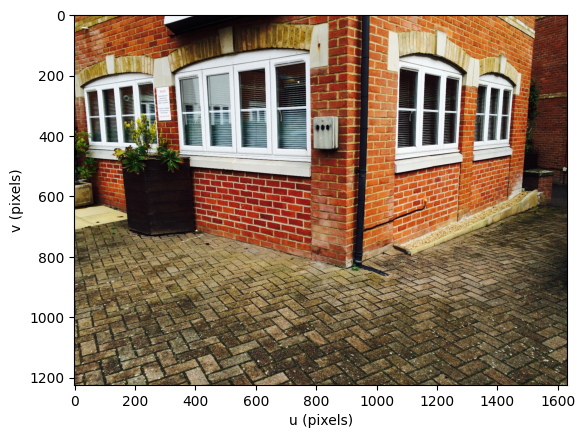

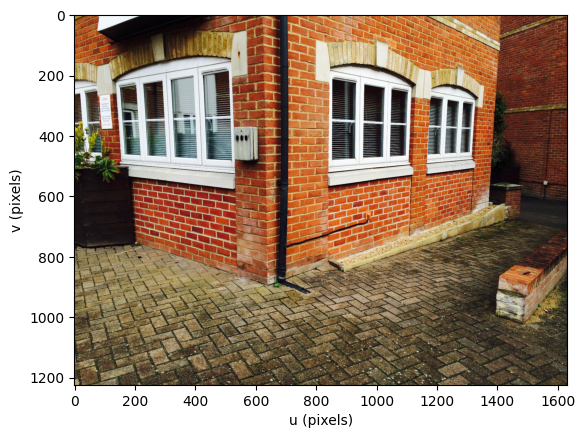

In [85]:
walls_l.disp()
walls_r.disp()

In [86]:
#Вычисление SIFT-Дескрипторов
sf_l = walls_l.SIFT(); #Для каждого из загруженных изображений вычисляются SIFT-дескрипторы
                       #(sf_l и sf_r), которые позволяют описать и идентифицировать ключевые точки на изображениях.
sf_r = walls_r.SIFT();

In [87]:
print(sf_l);
print(sf_r)

SIFTFeature features, 20072 points
SIFTFeature features, 18478 points


In [88]:
#Сопоставление Дескрипторов
matches = sf_l.match(sf_r); #Выполняется сопоставление SIFT-дескрипторов между левым и правым изображениями,
                            #что приводит к созданию объекта matches, содержащего информацию о найденных соответствиях.
matches

2797 matches

In [89]:
#Оценка Гомографии
H, resid = matches.estimate(CentralCamera.points2H, confidence=0.9, seed=0) #Используя найденные соответствия,
                                                                            #оценивается плоская гомография H между двумя изображениями,
                                                                            #применяя метод RANSAC с уровнем уверенности 0.9
                                                                            #для отсечения выбросов. resid возвращает остаточную ошибку оценки.
matches

2797 matches, with 967 (34.6%) inliers

In [90]:
print(H)
print(resid)
print(matches)

[[   1.337  0.03067   -569.1]
 [ 0.02445    1.052    5.321]
 [3.056e-05 -6.531e-06        1]]
35.56647622867766
2797 matches, with 967 (34.6%) inliers


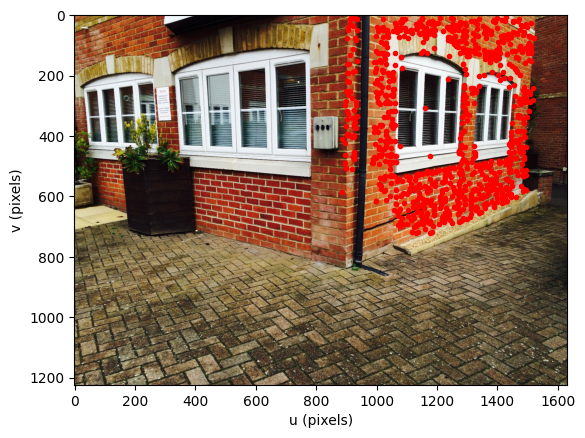

In [91]:
#Визуализация РезультатовВизуализация Результатов
walls_l.disp(block=None); #На левом изображении walls_l визуализируются точки,
                          #которые были идентифицированы как согласованные (inliers)
                          #в результате RANSAC, маркерами красного цвета.
plot_point(matches.inliers.p1, "r.");

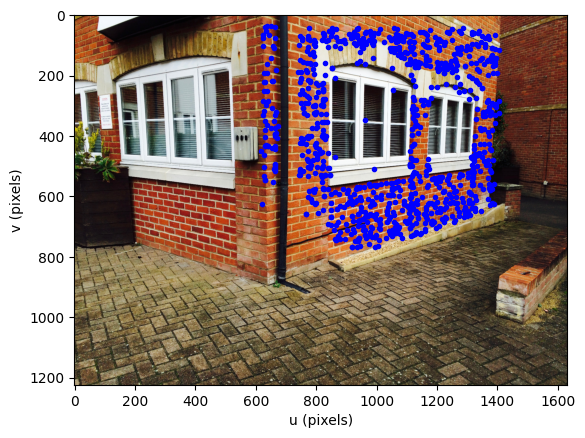

In [92]:
#Визуализация РезультатовВизуализация Результатов
walls_r.disp(block=None); #На левом изображении walls_l визуализируются точки,
                          #которые были идентифицированы как согласованные (inliers)
                          #в результате RANSAC, маркерами красного цвета.
plot_point(matches.inliers.p2, "b.");

In [93]:
#Идентификация Не Плоских Объектов
not_plane = matches.outliers; #Объекты, которые не согласуются с плоской гомографией и,
                              #следовательно, предположительно не принадлежат одной плоскости на изображении,
                              #идентифицируются как outliers (выбросы) в объекте matches.
not_plane

1830 matches, with 0 (0.0%) inliers

# 14.3 Sparse Stereo


## 14.3.1 3D Triangulation


В этом разделе мы обсуждаем процесс трехмерной треангуляции для пары стереоизображений с использованием разреженного набора соответствующих точек (sparse stereo). Этот процесс позволяет восстанавливать трехмерные координаты объектов сцены на основе их изображений с двух различных точек зрения.

In [94]:
#Поиск Соответствий между Изображениями
matches = sf_l.match(sf_r) #Используя SIFT-дескрипторы (sf_l и sf_r),
                            #находятся соответствующие точки
                            #на левом (walls_l) и правом (walls_r) изображениях

#Оценка Фундаментальной Матрицы
F, resid = matches.estimate(CentralCamera.points2F, confidence=0.99, seed=0); #С помощью метода RANSAC
                                                                   #оценивается фундаментальная матрица F для выбранных соответствий.
                                                                   #Остаточная ошибка resid отражает качество оценки.

In [95]:
F, resid

(array([[-5.754e-08, -5.269e-06, 0.002338],
        [4.942e-06, 3.89e-07, -0.03566],
        [-0.001941,  0.03546,        1]]),
 1.7674501802731584)

In [96]:
#Отбор Согласующихся Точек
matches = matches.inliers  # keep only the inliers
                          #Из всех найденных соответствий сохраняются только те,
                          #которые являются согласующимися (inliers),
                          #т.е. наиболее вероятно принадлежащими одному и тому же объекту на обоих изображениях.


2389 matches, with 2389 (100.0%) inliers

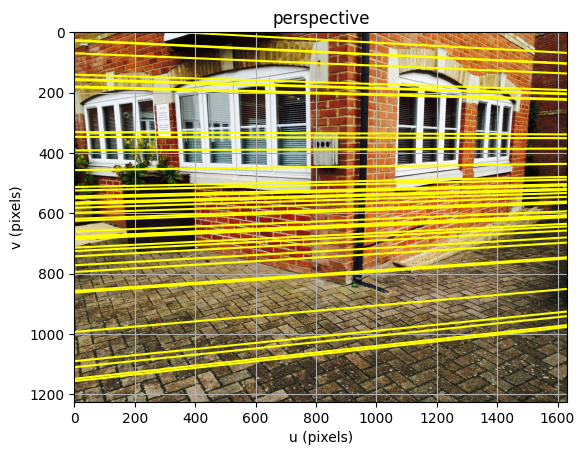

In [97]:
#Визуализация Эпиполярных Линий
camera = CentralCamera();         #На изображении walls_l визуализируются эпиполярные линии
                                  #для подмножества согласующихся точек, что демонстрирует их взаимное расположение
                                  # и направление в пространстве изображения.
camera.disp(walls_l, block=None);
camera.plot_epiline(F.T, matches.subset(40).p2, "yellow");

In [98]:
#Инициализация Камеры
f = walls_l.metadata("FocalLength")

4.15

In [99]:
name = walls_l.metadata("Model")

'iPhone 5s'

In [100]:
camera = CentralCamera(name=name, imagesize=walls_l.shape,  #Создается экземпляр CentralCamera с параметрами,
                                                            #полученными из метаданных изображения.
                                                            #Значение фокусного расстояния f переводится из миллиметров в метры.
                       f=f/1000, rho=2*1.5e-6)

           Name: iPhone 5s [CentralCamera]
     pixel size: 3e-06 x 3e-06
     image size: 1224 x 1632
           pose: t = 0, 0, 0; rpy/yxz = 0°, 0°, 0°
   principal pt: [     612      816]
   focal length: [ 0.00415  0.00415]

In [101]:
#Вычисление Эссенциальной Матрицы и Декомпозиция
E = camera.E(F) #Из фундаментальной матрицы F вычисляется эссенциальная матрица E,
                 #а затем производится декомпозиция для определения относительной позиции
                 #и ориентации второй камеры относительно первой.

array([[ -0.1101,   -10.08,   -2.762],
       [   9.457,   0.7444,   -44.71],
       [   2.845,    45.03,    1.149]])

In [102]:
T_1_2 = camera.decomposeE(E, [0, 0, 10]);
T_1_2.printline(orient="camera")

t = -0.976, 0.0669, -0.205; rpy/yxz = -0.441°, 1.28°, 0.716°


In [103]:
#Масштабирование Трансляции
t = T_1_2.t;       #Определяется и применяется масштабный коэффициент для вектора
                   #трансляции t на основе предположения о масштабе сцены.

s = 0.3 / t[0]  # estimate of translation scale factor
T_1_2.t = s * t  # scaled translation
#Визуализация Результатов
T_1_2.printline(orient="camera") #Выводятся параметры трансформации T_1_2 до и после масштабирования,
                                 #что позволяет оценить относительное перемещ

t = 0.3, -0.0206, 0.0631; rpy/yxz = -0.441°, 1.28°, 0.716°


In [104]:
#Вычисление Лучей Из Камеры
ray1 = camera.ray(matches[0].p1) #десь ray1 и ray2 представляют лучи, проецируемые из камеры
                                 #в направлении первой согласованной пары точек (matches[0].p1
                                 #на первом изображении и matches[0].p2 на втором соответственно).
                                 #pose=T_1_2 применяется ко второму лучу для учета относительного
                                 #положения и ориентации второй камеры по отношению к первой.

{ 0 0 0; 0.45053 -0.43771 1}

In [105]:
#Поиск Ближайшей Точки Между Лучами
ray2 = camera.ray(matches[0].p2, pose=T_1_2)

{ -0.0071757 0.27523 0.12379; 0.3282 -0.43513 0.98647}

In [106]:
P, e = ray1.closest_to_line(ray2); #Метод closest_to_line используется для вычисления ближайшей точки
                                   #между двумя лучами ray1 и ray2, что представляет метод триангуляции
                                   # для нахождения 3D-координат соответствующей точки P в пространстве.
                                   # e — это ошибка или расстояние между лучами в ближайшей точке,
                                   #что дает понимание о точности триангуляции.
P

array([   1.066,   -1.036,    2.367])

In [107]:
e

0.0006718430761683649

In [108]:
#Триангуляция Всех Согласованных Точек
ray1 = camera.ray(matches.p1);            #Повторяется процесс вычисления лучей для всех согласованных точек,
                                           #на этот раз используя полные наборы точек matches.p1 и matches.p2.
ray2 = camera.ray(matches.p2, pose=T_1_2);

In [109]:
len(ray1)

2389

In [110]:
P, e = ray1.closest_to_line(ray2);       #Применяется метод closest_to_line для каждой пары лучей,
                                         #возвращая массив 3D-координат P всех точек и соответствующие ошибки e.
P.shape

(3, 2389)

Анализ и Визуализация Результатов

In [111]:
#Вычисляются статистические показатели:
#среднее значение координат Z восстановленных точек  (z.mean()),

z = P[2, :];
z.mean()

2.2336901958654556

In [112]:
np.median(e) # медиана ошибок триангуляции (np.median(e)),

e.max() #и максимальная ошибка (e.max()).

0.024741940113809688

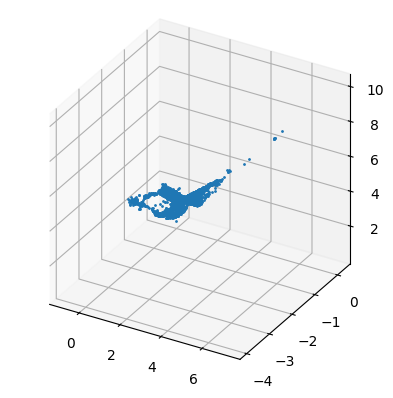

In [113]:
#С использованием функции plotvol3() создается трехмерное пространство для визуализации,
#а затем все восстановленные 3D-точки P отображаются в этом пространстве мелкими точками ('.'),
#что позволяет визуально оценить распределение и точность восстановления геометрии сцены.

plotvol3();
plt.plot(P[0,:], P[1,:], P[2,:], '.', markersize=2);

In [ ]:
!pip install open3d -U

In [194]:
#Создание 3D-Модели с Использованием Облака Точек
if not COLAB:
 walls_pcd = PointCloud(P)  #Создается облако точек walls_pcd из массива восстановленных 3D-точек P.
                            # Далее применяется трансформация, поворачивающая облако точек так,
                            #чтобы ось Y была направлена вверх.
                            #Это удобно для визуализации, поскольку в большинстве систем координат компьютерной графики
                            #и компьютерного зрения принято, чтобы ось Y была направлена вверх.
 walls_pcd.transform(SE3.Rx(pi))  # make y-axis upward
 walls_pcd.disp(block=True)  #Визуализация облака точек с блокировкой выполнения кода для
                             #просмотра результатов до тех пор, пока пользователь не закроет окно визуализации.


[Open3D WARNING] GLFW Error: X11: The DISPLAY environment variable is missing
[Open3D WARNING] Failed to initialize GLFW
[Open3D WARNING] [DrawGeometries] Failed creating OpenGL window.


In [116]:
walls_pcd = walls_pcd.remove_outlier(nb_points=10, radius=0.2)
                          #Удаление выбросов из облака точек с использованием метода remove_outlier,
                          #который удаляет точки, для которых в заданном радиусе (radius)
                          #находится меньше заданного числа ближайших точек (nb_points).
                          #Это помогает очистить облако точек от шума и аномальных точек.

PointCloud with 2243 points.

In [117]:
#Добавление Цвета к Облаку Точек
#if not COLAB:
colors = []
for m in matches:           #Для каждого согласованного соответствия из matches
                            #извлекаются цвета соответствующих точек с левого изображения walls_l,
                            #и эти цвета присваиваются точкам в облаке точек.
                            #Создается новое облако точек pcd с цветами, которое также поворачивается для корректной ориентации.
   colors.append(walls_l.image[int(m.p1[1]), int(m.p1[0]), :])
pcd = SE3.Rx(pi) * PointCloud(P, colors=np.array(colors).T)
pcd.disp(block=True)            #Визуализируется цветное облако точек pcd с блокировкой выполнения кода.

[Open3D WARNING] GLFW Error: X11: The DISPLAY environment variable is missing
[Open3D WARNING] Failed to initialize GLFW
[Open3D WARNING] [DrawGeometries] Failed creating OpenGL window.


In [118]:
#Перепроекция и Анализ Различий
p1_reproj = camera.project_point(P[:, 0]);          #Перепроекция первой точки из набора P на изображения обеих камер
                                                    #для анализа точности восстановления и согласования.
p2_reproj = camera.project_point(P[:, 0], pose=T_1_2);

In [119]:
(p1_reproj - matches[0].p1).T   #Вычисление различий между перепроектированными точками и исходными
                                 #точками согласований.
                                 #Это позволяет оценить точность восстановления 3D-позиций и качество триангуляции.
(p2_reproj - matches[0].p2).T

array([[-0.06476,   -804.6],
       [   804.9,   0.4298]])

In [120]:
#Настройка Регулировки Пучка (Bundle Adjustment)
bundle = BundleAdjust(camera);          #Создается экземпляр BundleAdjust для выполнения регулировки пучка (bundle adjustment)
                                        # — процесса оптимизации, который уточняет 3D-координаты точек, параметры камеры и ее позицию,
                                        #минимизируя проекционные ошибки между наблюдаемыми и предсказанными положениями
                                        #точек на изображениях. Это позволяет улучшить точность восстановленной 3D-модели.

In [121]:
#Инициализация Видов (Views) для Регулировки Пучка
view0 = bundle.add_view(SE3(), fixed=True);  #Создаются два "вида" (view) в объекте bundle для регулировки пучка.
                                             #Первый вид (view0) фиксируется (fixed=True), предполагая,
                                             #что это начальная позиция камеры и она известна точно.
                                             #Второй вид (view1) представляет позицию камеры после перемещения на 0.3
                                             #метра вдоль оси X (SE3.Tx(0.3)).
view1 = bundle.add_view(SE3.Tx(0.3));

In [122]:
#Добавление Ориентиров (Landmarks) и Проеций
for (Pj, mj) in zip(P[:, ::4].T, matches[::4]):
  landmark = bundle.add_landmark(Pj)             # add vertex
  bundle.add_projection(view0, landmark, mj.p1)  # add edge
  bundle.add_projection(view1, landmark, mj.p2)  # add edge
  #В цикле перебираются точки из массива P и соответствующие им точки согласования из matches,
  #выбирая каждую четвертую точку для упрощения.
  #Для каждой такой точки создается "ориентир" (landmark) в bundle,
  # который соответствует вершине в графе оптимизации.
  #Затем для каждого ориентира добавляются "ребра" (edges),
  #связывающие ориентиры с проекциями точек на изображениях для обоих видов.

In [123]:
bundle

Bundle adjustment problem:  2 views
    1 locked views: [0]
  598 landmarks
  1196 projections
  1806 total states
  1800 variable states
  2392 equations
  landmarks per view: min=598, max=598, avg=598.0
  views per landmark: min=2, max=2, avg=2.0

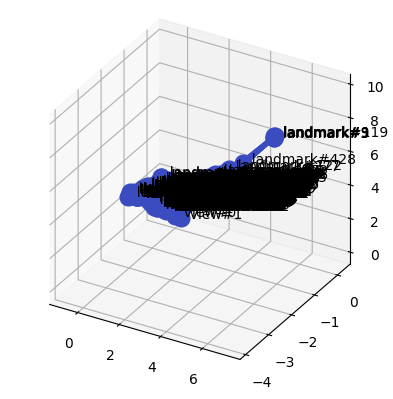

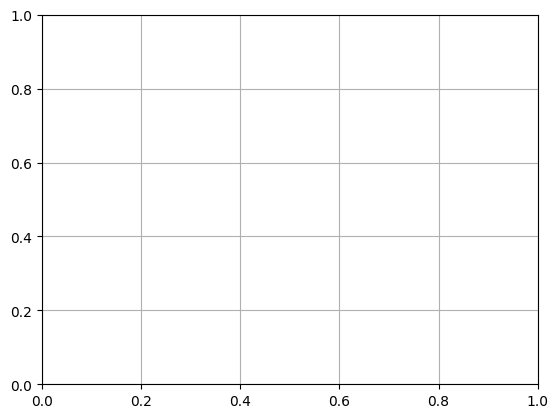

In [124]:
#Анализ Структуры Регулировки Пучка
bundle.plot() #Визуализируется структура регулировки пучка, показывающая связи между видами и ориентирами.

In [125]:
x = bundle.getstate(); #Извлекается текущее состояние параметров регулировки
                       #пучка в виде вектора x, а затем анализируется его размерность.
x.shape

(1806,)

In [126]:
x[6:12]              #Производится анализ частей вектора состояния,
                     #относящихся к параметрам позиции и ориентации второго вида
                     #и к координатам одного из ориентиров.

array([     0.3,        0,        0,        0,        0,        0])

In [127]:
x[12:15]

array([   1.066,   -1.036,    2.367])

In [128]:
bundle.errors(x)          #Вычисляются ошибки регулировки пучка для текущего состояния параметров,
                          #что позволяет оценить качество текущей модели.

1460212.3827897194

p, A, B = camera.derivatives(t, r, P);

In [129]:
#Оптимизация
x_new, resid = bundle.optimize(x); #Запускается процесс оптимизации, который пытается минимизировать общую ошибку
                                   #проекций путем коррекции параметров модели, включая положения камер и координаты
                                   #ориентиров. x_new содержит оптимизированные параметры,
                                   #а resid — остаточную ошибку после оптимизации.

Bundle adjustment cost 1.46e+06 -- initial
Bundle adjustment cost 3.42e+03 (solved in 4.45 sec)
Bundle adjustment cost 293 (solved in 8.52 sec)
Bundle adjustment cost 289 (solved in 7.59 sec)
Bundle adjustment cost 289 (solved in 9.35 sec)
Bundle adjustment cost 289 (solved in 8.22 sec)
Bundle adjustment cost 289 (solved in 6.45 sec)

 * 6 iterations in 45.4 seconds
 * Final RMS error is 0.49 pixels


In [130]:
#Применение Оптимизированных Параметро
bundle.setstate(x_new);  #Метод setstate применяет оптимизированный вектор состояния x_new
                          #к объекту регулировки пучка bundle.
                          #Это обновляет параметры модели, включая положения камер
                          #и координаты ориентиров, до их оптимизированных значений.

In [131]:
#Анализ Положения Второго Вида
bundle.views[1].pose.printline(orient="camera") #Выводится информация о положении и ориентации второй камеры после оптимизации.
                                                 #Это позволяет увидеть, как изменилась позиция и ориентация камеры
                                                 #в результате регулировки пучка.

t = 0.365, -0.0302, 0.0852; rpy/yxz = -0.601°, 1.27°, 0.117°


In [132]:
T_1_2.printline(orient="camera")    #Для сравнения выводится информация о положении и ориентации,
                                    #полученной ранее через декомпозицию матрицы E.
                                    #Это позволяет сравнить первоначальную оценку трансформации между камерами с
                                    # результатом после оптимизации.


t = 0.3, -0.0206, 0.0631; rpy/yxz = -0.441°, 1.28°, 0.716°


In [133]:
#Анализ Ориентиров
bundle.landmarks[0].P   #Извлекается и выводится позиция первого ориентира (landmark) после оптимизации.
                        #Это дает представление о том, как оптимизация повлияла на расположение ориентиров в 3D-пространстве.

array([   1.066,   -1.036,    2.367])

In [134]:
#Оценка Ошибок После Оптимизации

e = np.sqrt(bundle.getresidual()); #Вычисляется корень из квадратов остаточных ошибок для каждого наблюдения после оптимизации.
                                   #Это позволяет оценить, насколько хорошо оптимизированная модель соответствует наблюдаемым данным.

e.shape                   #Выводится размерность массива ошибок, чтобы понять, сколько наблюдений было учтено в процессе регулировки пучка.

(2, 598)

In [135]:
np.median(e, axis=1)  #Рассчитывается и выводится медианное и
                      #максимальное значение ошибок для каждого измерения.
                      #Эти статистические показатели помогают оценить общую точность и качество оптимизации.

array([  0.3014,    0.295])

In [136]:
np.max(e, axis=1)

array([   2.107,    1.984])

# 14.4 Dense Stereo Matching


Процесс плотного стереосопоставления включает в себя детальное сравнение изображений для нахождения соответствий между пикселями на двух стереоизображениях. Это позволяет создать более подробную 3D-модель сцены. В данном случае мы продолжаем работу с регулировкой пучка (bundle adjustment) для уточнения параметров камеры и положений точек в пространстве.

In [137]:
rocks_l = Image.Read("rocks2-l.png", reduce=2)
                                              # Загружаются левое (rocks_l) и правое (rocks_r) стереоизображения сцены со скалами.
                                              #Параметр reduce=2 уменьшает размер изображений в два раза для упрощения обработки данных.
rocks_r = Image.Read("rocks2-r.png", reduce=2)

Image: 638 x 555 (uint8), R:G:B [.../images/rocks2-r.png]

rocks_l.stdisp(rocks_r)

In [138]:
#Плотное Стереосоответствие
disparity, *_ = rocks_l.stereo_simple(rocks_r, hw=3, drange=[40, 90]); #Применяется упрощенный метод плотного стереосоответствия
                                                               #к парам изображений, используя размер окна hw=3 для поиска схожих участков
                                                               #и диапазон поиска смещения drange=[40, 90].
                                                               # Возвращается карта смещений (disparity),
                                                               #показывающая разницу в позициях одинаковых точек на левом и правом изображениях.

/usr/local/lib/python3.10/dist-packages/numpy/lib/arraypad.py:147: RuntimeWarning: invalid value encountered in cast
  padded[left_slice] = value_pair[0]
/usr/local/lib/python3.10/dist-packages/numpy/lib/arraypad.py:151: RuntimeWarning: invalid value encountered in cast
  padded[right_slice] = value_pair[1]


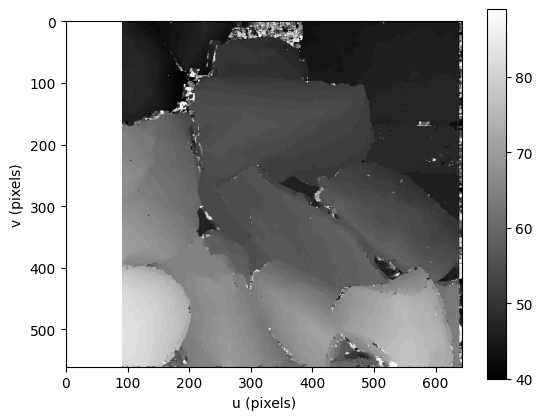

In [139]:
disparity.disp(colorbar=True);

In [140]:
disparity, similarity, DSI = rocks_l.stereo_simple(rocks_r, hw=3, drange=[40, 90])
                               #Повторное вычисление с возвратом карты смещений disparity, карты сходства similarity
                               #и трехмерного массива индекса подобия смещений (Disparity Space Image, DSI),
                               #содержащего оценки сходства для каждого пикселя и каждого возможного смещения в заданном диапазоне.

In [141]:
#Анализ DSI
DSI.shape   #Выводится форма трехмерного массива DSI, показывающая размеры изображения и диапазон рассматриваемых смещений.

(561, 644, 50)

In [142]:
np.argmax(DSI, axis=2); #Используется для определения индекса (смещения),
                        #при котором достигается максимальное значение сходства для каждого пикселя,
                        #что позволяет сформировать карту смещений.

In [143]:
similarity_values = np.max(DSI, axis=2); #Вычисляется максимальное значение сходства для каждого пикселя,
                                         #что дает понимание о степени уверенности в соответствии смещений.

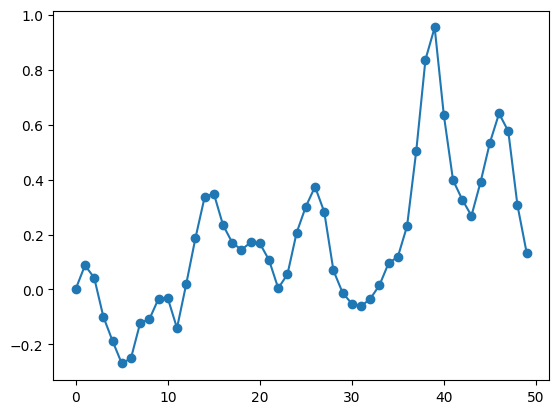

In [144]:
plt.plot(DSI[439, 138, :], "o-"); #Строится график значений сходства для конкретного пикселя с координатами [439, 138]
                                  #по всем возможным смещениям. Это позволяет визуально оценить,
                                  #как меняется сходство в зависимости от смещения и определить,
                                  #какое смещение наиболее вероятно соответствует данному пикселю.

## 14.4.1 Peak Refinement


14.4.1 Уточнение Пиков

In [145]:
disparity_refined, A = Image.DSI_refine(DSI) #Этот шаг включает в себя уточнение результата,
                                              #полученного на этапе плотного стереосопоставления.
                                              #Функция DSI_refine принимает на вход трехмерный массив индекса подобия смещений (DSI)
                                              #и возвращает уточненную карту смещений disparity_refined,
                                              #а также некоторые дополнительные метрики или параметры уточнения, хранящиеся в A.
                                              #Уточнение позволяет повысить точность карты смещений,
                                              #улучшив оценку глубины за счет более точного определения пика сходства.

## 14.4.2 Stereo Failure Modes


Режимы Сбоя Стереосопоставления

### 14.4.2.1 Multiple peaks


Множественные пики в DSI указывают на ситуацию, когда для одного и того же пикселя существует несколько почти одинаково хороших совпадений смещений. Это может привести к ошибкам в определении истинного смещения и, как следствие, в оценке глубины.

### 14.4.2.2 Weak matching


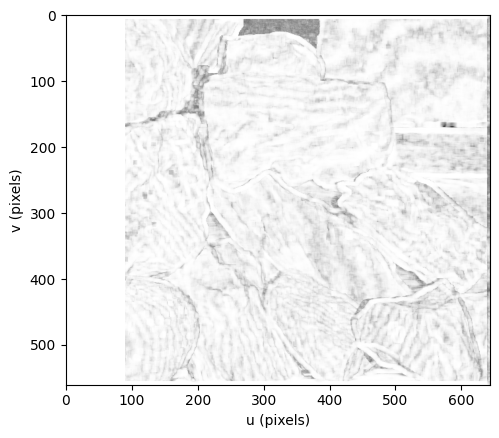

In [146]:
similarity.disp(); #Отображается карта сходства, полученная на этапе плотного стереосопоставления.
                    #Карта показывает степень сходства между сопоставляемыми пикселями на двух изображениях.


/usr/local/lib/python3.10/dist-packages/machinevisiontoolbox/ImageCore.py:235: UserWarning: defaulting color to RGB
  warnings.warn("defaulting color to RGB")
/usr/local/lib/python3.10/dist-packages/matplotlib/cm.py:478: RuntimeWarning: invalid value encountered in cast
  xx = (xx * 255).astype(np.uint8)


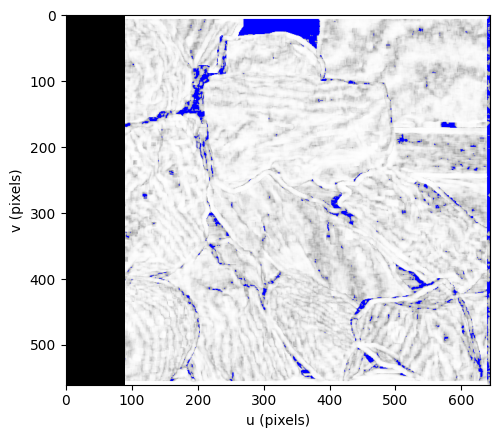

In [147]:
similarity.choose("blue", similarity < 0.6).disp(); #Модифицируется карта сходства так, чтобы значения ниже порога 0.6
                                                    #(предполагающие слабое сопоставление) выделялись синим цветом.
                                                    #Это позволяет визуализировать области на изображении,
                                                    #где сопоставление точек осуществляется с меньшей уверенностью.

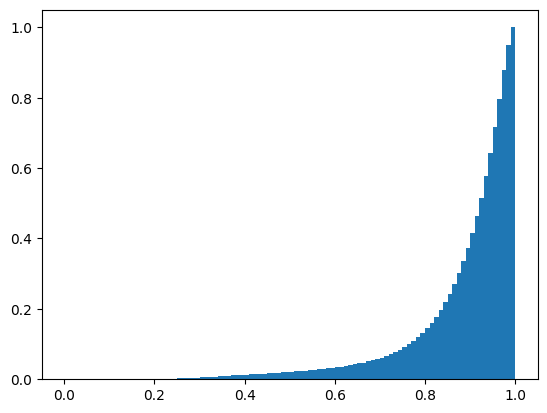

In [148]:
plt.hist(similarity.view1d(), 100, (0, 1), cumulative=True, density=True);
                       #Строится кумулятивная гистограмма распределения значений сходства,
                       #что дает представление о распределении уровней сходства между пикселями на стереопарах.
                       #Гистограмма может выявить проблемные области, где сходство низкое,
                       #что указывает на потенциальные сложности при восстановлении глубины.

### 14.4.2.3 Broad peak


### 14.4.2.4 Quantifying Failure Modes


14.4.2.4 Количественная Оценка Режимов Сбоя

In [149]:
#Количественная Оценка Режимов Сбоя
status = np.ones(disparity.shape); #Создается массив status той же формы, что и карта смещений disparity,
                                   #изначально заполненный единицами, что предполагает успешное сопоставление для всех пикселей.

In [150]:
U, V = disparity.meshgrid()             #Создаются сетки координат U и V для карты смещений.

status[np.isnan(disparity.image)] = 5   # no similarity computed

                                        #Пикселям, для которых не было вычислено сходство (т.е. значения disparity являются NaN),
                                        #присваивается статус 5.

status[U <= 90] = 2                     # no overlap
                                        #Областям карты смещений, где координата U меньше или равна 90,
                                        #присваивается статус 2, что указывает на отсутствие перекрытия изображений.

status[similarity.image < 0.6] = 3      # weak match
                                        #Пикселям с низким уровнем сходства (меньше 0.6) присваивается статус 3,
                                        #что означает слабое сопоставление.

status[A.image >= -0.1] = 4             # broad peak
                                        #Пикселям, для которых уточнение пика (A.image)
                                        #показывает значение больше или равное -0.1,
                                        #присваивается статус 4, указывая на широкий пик.

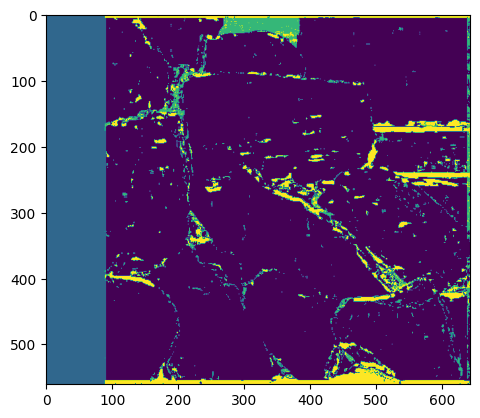

In [151]:
plt.imshow(status);    #Визуализируется карта status, позволяя наглядно оценить распределение различных режимов сбоя по изображению.

In [152]:
(status == 1).sum() / status.size * 100

76.99427597125806

In [153]:
disparity_valid = disparity.choose(0, status!=1) #Рассчитывается процент успешных сопоставлений (статус 1)
                  #от общего числа пикселей в изображении.

Image: 644 x 561 (float32)

### 14.4.2.5 Slicing the DSI


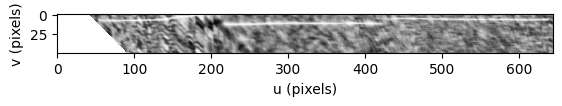

In [154]:
#Анализ Среза DSI
Image(DSI[100, :, :].T).disp();  #Визуализируется срез трехмерного массива индекса подобия смещений (DSI) для пикселя
                                  #с индексом 100 по высоте.
                                  #Транспонирование и визуализация среза позволяют оценить распределение подобия смещений
                                  #для данного пикселя, что помогает понять, насколько четко определено подобие
                                  #и наличие возможных множественных пиков.

### 14.4.2.6 Summary


В разделе описываются обобщения и выводы, сделанные на основе анализа режимов сбоя стереосопоставления и методов их обработки

### 14.4.2.7 Advanced Stereo Matching


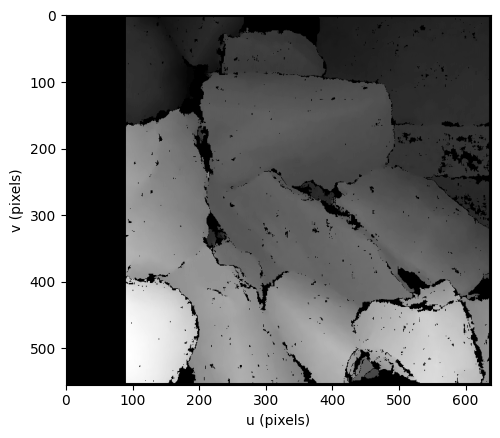

In [155]:
#Продвинутое Стереосопоставление
disparity_BM = rocks_l.stereo_BM(rocks_r, hw=3, drange=[40, 90], speckle=(200, 2))
                                  #Применяется метод блочного сопоставления (Block Matching, BM) для вычисления карты смещений.
                                  #Метод BM является одним из базовых подходов к плотному стереосопоставлению,
                                  #предполагающем поиск совпадений блоков пикселей между левым и правым изображениями.
                                  #Параметр speckle используется для фильтрации шумовых областей.
disparity_BM.disp();

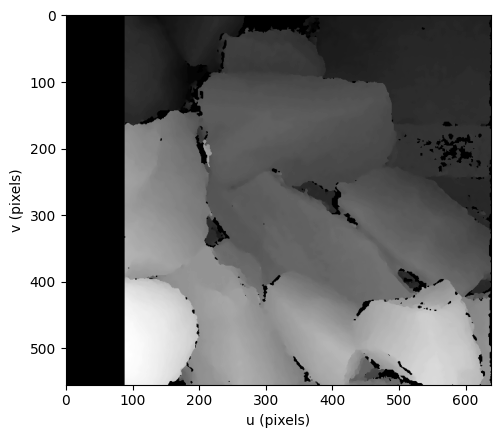

In [156]:
rocks_l.stereo_SGBM(rocks_r, hw=3, drange=[40, 90], speckle=(200, 2)).disp();
                                                  #Применяется метод Semi-Global Block Matching (SGBM),
                                                  #который улучшает результаты блочного сопоставления за счет использования
                                                  #полуглобальной оптимизации, учитывая не только локальные,
                                                  #но и соседние соответствия.

### 14.4.2.8 3D Reconstruction


In [157]:
di = disparity_BM.image * 2 + 274; #Вычисляются 3D-координаты (X, Y, Z) на основе карты смещений disparity_BM,
                                    #используя геометрические соотношения и параметры стереосистемы
                                    #(фокусное расстояние f, базовое расстояние b и центр карты смещений (u0, v0)).

In [158]:
U, V = disparity_BM.meshgrid();
u0, v0 = disparity.centre;
f = 3740;   # pixels, according to Middlebury website
b = 0.160;  # m, according to Middlebury website
X = b * (U - u0) / di; Y = b * (V - v0) / di; Z = f * b / di;

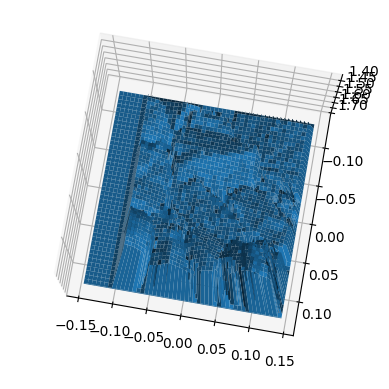

In [159]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
ax.plot_surface(X, Y, Z)
ax.view_init(-100, -100)   #Визуализация полученной 3D-модели сцены с помощью поверхности,
                            #что позволяет наглядно представить глубину и рельеф изображаемой сцены.

In [160]:
if not COLAB:
    cam = CentralCamera(f=f, imagesize=rocks_l.shape);
    pcd = PointCloud(Z, image=rocks_l, camera=cam, depth_trunc=1.9)
    pcd *= SE3.Rx(pi);  # make y-axis upward
    pcd.disp(block=True)        #Создается и визуализируется облако точек на основе данных о глубине Z
                                #и изображения rocks_l. Трансформация SE3.Rx(pi) корректирует ориентацию облака точек,
                                #делая ось Y направленной вверх.
                                # Параметр depth_trunc используется для усечения точек с глубиной выше заданного порога,
                                #что помогает удалить далекие или шумовые точки.

## 14.4.3 Image Rectification


In [ ]:
walls_l = Image.Read('walls-l.png', reduce=2)
walls_r = Image.Read('walls-r.png', reduce=2)
             #Загружаются левое и правое стереоизображения, уменьшенные в два раза для упрощения обработки.

In [162]:
#Вычисление SIFT-Дескрипторов и Сопоставление
sf_l = walls_l.SIFT()
sf_r = walls_r.SIFT()  #На изображениях вычисляются SIFT-дескрипторы,
                       #затем осуществляется сопоставление дескрипторов для нахождения пар соответствующих точек.

SIFTFeature features, 18478 points

In [163]:
matches = sf_l.match(sf_r);

In [164]:
#Оценка Фундаментальной Матрицы
F, resid = matches.estimate(CentralCamera.points2F,
                            method="ransac", confidence=0.95);
                             #С использованием метода RANSAC оценивается фундаментальная матрица F,
                             #которая описывает эпиполярные геометрические связи между стереопарами.

In [165]:
H_l, H_r = walls_l.rectify_homographies(matches, F)
                      #На основе фундаментальной матрицы и сопоставлений точек
                      #вычисляются гомографии H_l и H_r
                      #для ректификации левого и правого изображений соответственно.

In [166]:
#Применение Ректификации
walls_l_rect = walls_l.warp_perspective(H_l)
walls_r_rect = walls_r.warp_perspective(H_r) #Ректифицированные изображения получаются применением
                                             #вычисленных гомографий к исходным стереоизображениям.

Image: 1632 x 1224 (uint8), R:G:B

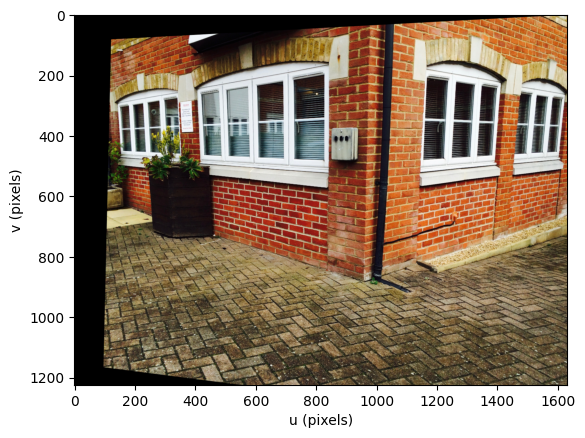

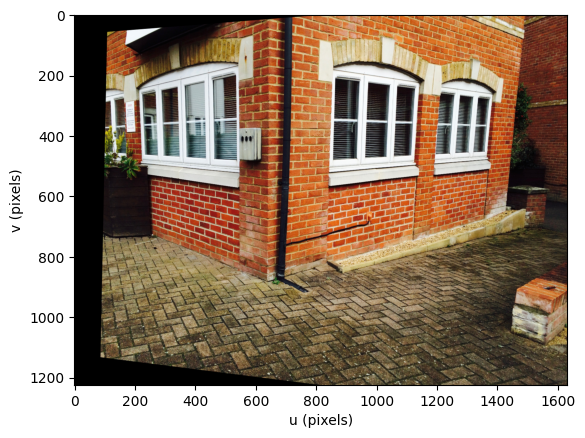

In [167]:
#Визуализация Ректифицированных Изображений
if COLAB:
    walls_l_rect.disp()
    walls_r_rect.disp()
else:
    walls_l_rect.stdisp(walls_r_rect)

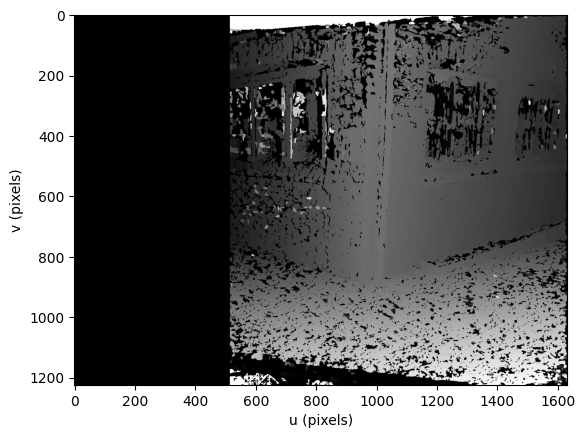

In [168]:
walls_l_rect.stereo_SGBM(walls_r_rect, hw=7, drange=[180, 530], speckle=(50, 2)).disp();
                        #На ректифицированных изображениях выполняется плотное стереосопоставление
                        #с использованием метода Semi-Global Block Matching (SGBM),
                        #что позволяет получить карту глубины сцены.

# 14.5 Anaglyphs


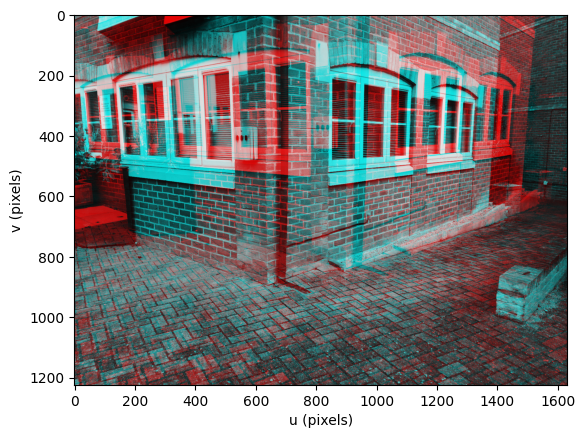

In [169]:
walls_l.anaglyph(walls_r, "rc").disp();

# 14.7 Point Clouds


В разделе 14.7 обсуждается работа с облаками точек, включая чтение, отображение, уменьшение разрешения, вычисление нормалей и сегментацию плоскостей. Облака точек представляют собой важный инструмент в области компьютерного зрения и 3D-реконструкции, позволяя представлять и анализировать трехмерные структуры объектов и сцен.

In [170]:
if not COLAB:
    #Чтение и Визуализация Облака Точек
    bunny_pcd = PointCloud.Read('data/bunny.ply') #Загружается облако точек из файла bunny.ply,
    bunny_pcd.disp(block=True)                    #представляющего 3D-модель кролика. Метод disp(block=True)
                                                  #используется для визуализации облака точек с блокировкой выполнения кода
                                                  #до закрытия окна визуализации.

   #Уменьшение Разрешения Облака Точек
    pcd = bunny_pcd.voxel_grid(voxel_size=0.01).disp(block=True)
    pcd = bunny_pcd.downsample_voxel(voxel_size=0.01)  #Производится уменьшение разрешения облака точек методом вокселизации
                                                        #с размером вокселя 0.01, что позволяет уменьшить количество точек
                                                        #для упрощения последующей обработки.
                                                        #Возможно, в коде содержится небольшое дублирование операций,
                                                        #однако обе строки демонстрируют использование методов для уменьшения разрешения.

    #Вычисление Нормалей
    pcd.normals(radius=0.1, max_nn=30)
    pcd.disp(block=True)                  #Вычисляются нормали к поверхности для каждой точки в уменьшенном облаке точек,
                                          #используя радиус поиска 0.1 и максимальное количество ближайших соседей 30.
                                          #Вычисление нормалей необходимо для многих задач,
                                          #связанных с обработкой и анализом облаков точек.

## 14.7.1 Fitting a Plane


In [171]:
if not COLAB:
    pcd = walls_pcd
    # plane, plane_pcd, pcd = pcd.segment_plane(distance_threshold=0.05, seed=0)

    #Сегментация Плоскостей
    plane, plane_pcd, pcd = pcd.segment_plane(distance_threshold=0.05)
    print(plane)                #Производится сегментация облака точек для выделения плоскостей.
                                #Метод segment_plane использует пороговое значение расстояния 0.05
                                #для определения принадлежности точек к плоскости.
                                #Возвращаются параметры выделенной плоскости plane,
                                #облако точек, соответствующее этой плоскости plane_pcd, и остальное облако точек pcd.

    print(plane_pcd)        #Выводится информация об облаке точек, соответствующем выделенной плоскости.

    # plane, plane_pcd, pcd = pcd.segment_plane(distance_threshold=0.05, seed=0)
    plane, plane_pcd, pcd = pcd.segment_plane(distance_threshold=0.05)
    print(plane)

## 14.7.2 Matching Two Sets of Points


In [172]:
if not COLAB:
   #Подготовка Модели и Данных
    model = bunny_pcd.downsample_random(0.1, seed=0)
    data = SE3.Trans(0.3, 0.4, 0.5) * SE3.Rz(50, unit="deg") * bunny_pcd.downsample_random(0.05, seed=-1);
      #Создается "модель" model, уменьшенная версия облака точек кролика,
      #и "данные" data, которые представляют собой другую уменьшенную версию того же облака точек,
      #но преобразованную (смещенную и повернутую) для создания искусственного примера.

    #Окраска и Визуализация Модели и Данных
    model.paint([0, 0, 1])  # blue
    data.paint([1, 0, 0])   # red
    (model + data).disp(block=True)
       #Модель окрашивается в синий цвет, а данные — в красный для наглядного различия.
       #Их суммарное облако точек визуализируется,
       #чтобы продемонстрировать исходное положение обеих частей.

    #Применение Метода ICP
    T, status = model.ICP(data, max_correspondence_distance=1,
                    max_iteration=2000, relative_fitness=0, relative_rmse=0)
                    #Метод ICP используется для выравнивания облака точек data с облаком точек model.
                    #Параметры метода задают максимальное расстояние для соответствия между точками,
                    #максимальное количество итераций и критерии остановки
                    #(относительная подгонка и среднеквадратическая ошибка).

    #Вывод Результата Трансформации
    T.printline()                 #Выводится информация о трансформации T, найденной методом ICP,
                                  #которая лучше всего совмещает данные с моделью.

    #Визуализация Результата Сопоставления
    (model + T.inv() * data).disp(block=True)  #Преобразованные данные data, умноженные на обратную трансформацию T.inv(),
                                               #визуализируются вместе с моделью.
                                               #Это позволяет наглядно увидеть результат выравнивания:
                                               #оба облака точек должны теперь совпадать.

Метод ICP является мощным инструментом для сопоставления и выравнивания облаков точек, что позволяет выполнить точную 3D-реконструкцию и анализ объектов. Он широко применяется в робототехнике, когда необходимо сопоставить данные с датчиков с моделью окружающего мира, в археологии для восстановления фрагментов артефактов, в медицине для выравнивания 3D-сканов и во многих других областях.

# 14.8 Applications


## 14.8.1 Perspective Correction


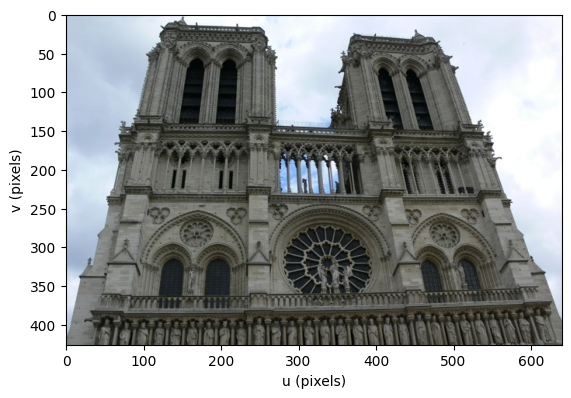

In [173]:
notredame = Image.Read("notre-dame.png");
notredame.disp(); #Изображение отображается для визуальной оценки и последующего выбора точек для коррекции перспективы.

In [174]:
# this won't work with Jupyter, use the pre-picked points defined in the next cell
# picked_points = plt.ginput(4); #Пользователь в интерактивном режиме выбирает на изображении четыре точки,
                                 #образующие искаженный прямоугольник или квадрат.
                                 #Эти точки будут использоваться для определения гомографии,
                                 #необходимой для коррекции перспективы.
                                 #plt.ginput(4) позволяет удобно выбрать эти точки с помощью мыши.

# p1 = np.array(picked_points).T; #Выбранные точки преобразуются в массив numpy,
                                  #который затем транспонируется для удобства последующей работы.
                                  #Массив p1 содержит координаты выбранных точек.

In [175]:
# coordinates of 4 points that mark the corners of a rectangle on the face of
# the building
#Определение Координат Точек
p1 = np.array([
        [ 44.1364,   94.0065,  537.8506,  611.8247],
        [377.0654,  152.7850,  163.4019,  366.4486]]);
        #Заданы координаты четырех точек (p1), которые обозначают углы искаженного прямоугольника на лицевой стороне здания.

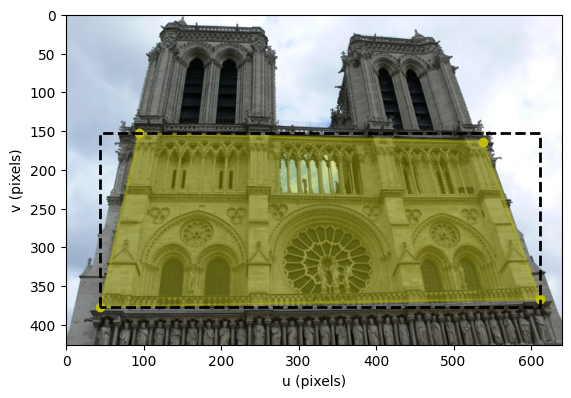

In [176]:
#Визуализация Точек и Прямоугольника
notredame.disp(block=None);
plot_polygon(p1, filled=True, color="y", alpha=0.4, linewidth=2);
plot_point(p1, "yo");
   #Исходное изображение отображается, а затем на нем визуализируется прямоугольник,
   #образованный точками p1, и сами точки отмечаются желтыми окружностями.
   #Это наглядно показывает, какие именно участки изображения будут использоваться для коррекции перспективы.

#Вычисление Гомографии
mn = p1.min(axis=1);
mx = p1.max(axis=1);
p2 = np.array([[mn[0], mn[0], mx[0], mx[0]], [mx[1], mn[1], mn[1], mx[1]]]);
plot_polygon(p2, "k--", close=True, linewidth=2);

In [177]:
H, _ = CentralCamera.points2H(p1, p2, method="leastsquares")
    #Определены желаемые координаты точек p2 после коррекции, которые формируют идеальный прямоугольник.
    #Вычисляется гомография H, преобразующая искаженный прямоугольник в идеальный,
    # используя метод наименьших квадратов.
H

array([[     1.4,   0.3827,   -136.6],
       [-0.07853,    1.805,   -83.11],
       [-0.0002687, 0.001557,        1]])

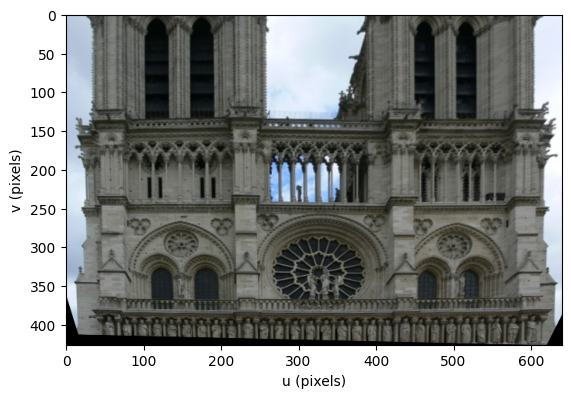

In [178]:
#Применение Гомографии и Анализ Результата
notredame.warp_perspective(H).disp();
  #К изображению применяется преобразование перспективы с использованием вычисленной гомографии H.
  #Результат показывает, как изображение выглядело бы, если бы фотография была сделана
  #перпендикулярно лицевой стороне здания.

Анализ Позиции и Нормалей После Коррекции

In [179]:
f = notredame.metadata("FocalLength")

7.4

In [180]:
cam = CentralCamera(imagesize=notredame.shape, f=f/1000, sensorsize=[7.18e-3, 5.32e-3])

           Name: perspective [CentralCamera]
     pixel size: 1.121875e-05 x 1.2488262910798123e-05
     image size: 426 x 640
           pose: t = 0, 0, 0; rpy/yxz = 0°, 0°, 0°
   principal pt: [     213      320]
   focal length: [  0.0074   0.0074]

In [181]:
pose, normals = cam.decomposeH(H)
pose.printline(orient="camera")
     #Используя метаданные изображения для определения фокусного расстояния и параметры камеры,
     #вычисляется позиция и ориентация камеры после коррекции (pose) и нормали к плоскости (normals).
     #Это дает представление о геометрических и перспективных свойствах сцены после коррекции.

t = 0.139, -0.614, 0.238; rpy/yxz = 3.69°, -36.9°, -8.32°
t = -0.139, 0.614, -0.238; rpy/yxz = 3.69°, -36.9°, -8.32°
t = -0.0308, 0.119, -0.661; rpy/yxz = 1.06°, 0.94°, 1.36°
t = 0.0308, -0.119, 0.661; rpy/yxz = 1.06°, 0.94°, 1.36°


In [182]:
normals[0].T

array([[-0.02788,   0.1523,   0.9879]])

## 14.8.2 Image Mosaicing


In [183]:
#Загрузка Изображений
images = ImageCollection("mosaic/aerial2-*.png", mono=True);
    #Загружаются изображения для мозаики. В данном случае, используются аэрофотоснимки.

In [184]:
#Создание Композитного Изображения
composite = Image.Zeros(2_000, 2_000) #Создается пустое композитное изображение (composite) достаточного размера
                                      #и на него помещается первое изображение из коллекции.

Image: 2000 x 2000 (uint8)

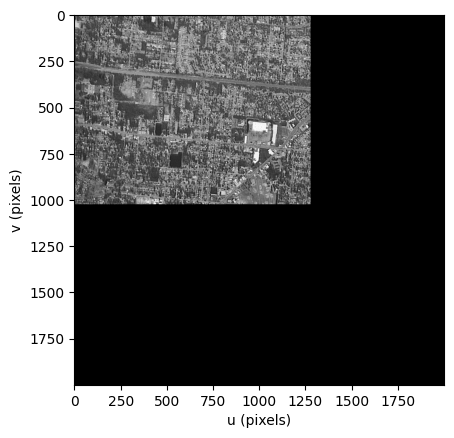

In [185]:
composite.paste(images[0], (0, 0));
#Дисплей Композитного Изображения
composite.disp();  #Отображение текущего состояния композитного изображения.

In [186]:
#Обработка Следующего Изображения
next_image = images[1]  #Выбирается следующее изображение для добавления в мозаику.

#Вычисление SIFT-Дескрипторов и Сопоставление
sf_c = composite.SIFT()
sf_next= next_image.SIFT()
match = sf_c.match(sf_next);  #Для композитного изображения и следующего изображения вычисляются SIFT-дескрипторы,
                              #после чего осуществляется сопоставление точек между этими изображениями.

In [187]:
#Оценка Гомографии
H, _ = match.estimate(CentralCamera.points2H, "ransac", confidence=0.99);
                                     #С использованием метода RANSAC оценивается гомография H, которая позволяет преобразовать
                                     #следующее изображение так, чтобы оно правильно вписалось в композитное изображение.
H

array([[  0.9725,    0.137,   -245.6],
       [  -0.137,   0.9725,   -95.92],
       [2.668e-09, 1.639e-09,        1]])

In [188]:
#Преобразование и Добавление Следующего Изображения
tile, topleft, corners = next_image.warp_perspective(H, inverse=True, tile=True)

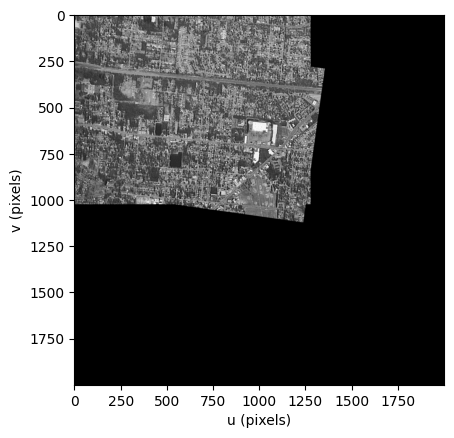

In [189]:
composite.paste(tile, topleft, method="blend"); #Следующее изображение преобразуется согласно найденной гомографии H
                                                #и добавляется в композитное изображение с использованием метода наложения
                                                #с смешиванием (blend), чтобы обеспечить плавный переход между изображениями.
#Дисплей Обновленного Композитного Изображения
composite.disp();  #Отображается обновленное состояние композитного изображения с добавленным новым тайлом.

## 14.8.3 Visual Odometry


In [190]:
import mvtbdata.mvtb_load_image_data

left = ZipArchive("bridge-l.zip", filter="*.pgm", mono=True, dtype="uint8",
                  maxintval=4095, roi=[20, 750, 20, 480]);
                  #Загружается серия монохромных изображений (*.pgm) из архива bridge-l.zip,
                  #представляющая собой последовательность снимков, сделанных с левой стороны моста.
                  #Изображения обрезаются с использованием области интереса (Region of Interest, ROI)
                  #для фокусировки на определенной части сцены.
len(left)

downloaded bridge-l.zip --> /usr/local/lib/python3.10/dist-packages/mvtbdata/images/bridge-l.zip
downloaded bridge-r.zip --> /usr/local/lib/python3.10/dist-packages/mvtbdata/images/bridge-r.zip


251

In [191]:
import mvtbdata.mvtb_load_image_data
import cv2

In [192]:
if not COLAB:  # simple animations do not work properly in Jupyter
  #Анимация Последовательности Изображений
  for image in left:
    #image.disp(reuse=True, block=None)
    image.disp(reuse=True, fps=10, title="bridge-l", matplotlib=False)
  #cv_destroy_window("bridge-l")
  cv2.destroyWindow("bridge-l")
  #Визуализируется последовательность изображений с частотой 10 кадров в секунду.
  #Этот шаг помогает визуально оценить движение наблюдателя через сцену.

<div class="note">

The commented out code produces an animation for a Python script, however, using Jupyter it produces a set of separate images.  Use OpenCV instead (`matplotlib=False`) to display the animation in a separate window.
</div>

In [193]:
#Обнаружение и Отображение ORB-Фич
for image in left:
   features = image.ORB(nfeatures=20)         # compute ORB features
   image = image.colorize()                   # create RGB image
   features.draw2(image, color='y');          # render ORB features into image
   # image.disp(reuse=True, fps=20, matplotlib=False) # display the image
   # features.plot()                          # overlay the features
   # pause(0.05)

   features.draw2(image, color='y');          # render ORB features into image
   image.disp(reuse=True, fps=20, matplotlib=False) # display the image
     #Для каждого изображения в последовательности вычисляются ORB (Oriented FAST and Rotated BRIEF) фичи,
     #которые являются эффективными для задач визуальной одометрии благодаря своей инвариантности к вращению и изменению масштаба.
     #ыделенные фичи отображаются на цветном изображении с использованием желтого цвета.

error: OpenCV(4.8.0) /io/opencv/modules/highgui/src/window.cpp:449: error: (-215:Assertion failed) !winname.empty() in function 'namedWindow'


In [ ]:
right = ZipArchive("bridge-r.zip", mono=True, dtype="uint8",
                   maxintval=4095, roi=[20, 750, 20, 480]);
                   #Аналогично предыдущему шагу с левой камерой, загружаются изображения,
                  #сделанные правой камерой, из архива bridge-r.zip.
                  #Применяется фильтрация и обрезка для сфокусирования на интересующей области сцены.

In [ ]:
%run -m visodom
#Этот шаг предполагает выполнение модуля визуальной одометрии (visodom), который может быть скриптом или модулем Python,
#предназначенным для обработки последовательности стереоизображений и оценки движения на основе этих данных.
#В данном случае, %run -m visodom указывает Jupyter или IPython на выполнение модуля visodom как основной программы.
#Обратите внимание, что детали реализации и функциональность visodom не описаны,
# поскольку этот модуль предполагается пользовательским и должен быть предварительно подготовлен для в
#ыполнения задач визуальной одометрии.

In [ ]:
#Анализ Временных Меток
ts = np.loadtxt(left.open("timestamps.dat"));

In [ ]:
plt.plot(np.diff(ts));
#Загружаются временные метки (timestamps.dat), связанные с кадрами левой камеры,
#что позволяет анализировать интервалы времени между последовательными снимками.
#np.diff(ts) вычисляет разницу между последовательными временными метками, а plt.plot визуализирует эти разницы.
#Этот анализ может быть полезен для понимания частоты кадров и идентификации возможных задержек или пропусков в данных.